**RAPPORT D'ANALYSE DE DONNÉES RELATIVES AU CRÉDIT**

**Introduction**

**1) Rappel de la problématique :**

L'institution financière cherche à identifier, au sein de sa clientèle de cartes de crédit, les individus présentant une probabilité élevée de défaut de paiement. Le jeu de données fourni regroupe des informations socio‑démographiques, économiques et historiques de paiement qui permettent d'explorer statistiquement les déterminants du non‑remboursement et d'estimer le risque de défaut au niveau individuel. L'analyse vise à produire des éléments robustes pour la segmentation des clients et l'aide à la décision en matière de gestion du risque de crédit.


**2) Objectifs du projet :**

- Mettre en oeuvre un travail collectif d'analyse sur un jeu de données réel.
- Appliquer des méthodes rigoureuses de nettoyage et de préparation des données.
- Réaliser une analyse statistique descriptive, ainsi que des analyses univariées et bivariées approfondies.
- Mobiliser des méthodes d'analyse multivariée (ACP, AFC, ACM) et des techniques de classification afin d'identifier des groupes homogènes de clients à risque.
- Présenter les résultats de manière synthétique, tant dans un rapport écrit que lors d'une présentation orale, en soulignant les implications opérationnelles et les limites de l'étude.


In [118]:
# --Telechargement du package ucimlrepo et des donnees--
#!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 

In [119]:
# metadata 
default_of_credit_card_clients.metadata 


{'uci_id': 350,
 'name': 'Default of Credit Card Clients',
 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients',
 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv',
 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.",
 'area': 'Business',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 30000,
 'num_features': 23,
 'feature_types': ['Integer', 'Real'],
 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'],
 'target_col': ['Y'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2009,
 'last_updated': 'Fri Mar 29 2024',
 'dataset_doi': '10.24432/C55S3H',
 'creators': ['I-Cheng Yeh'],
 'intro_paper': {'ID': 365,
  'type': 'NATIVE',
  'title': 'The comparisons of data mining techniques for the

In [120]:
# variable information 
default_of_credit_card_clients.variables 

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,None,None,no
1,X1,Feature,Integer,None,LIMIT_BAL,None,no
2,X2,Feature,Integer,Sex,SEX,None,no
3,X3,Feature,Integer,Education Level,EDUCATION,None,no
4,X4,Feature,Integer,Marital Status,MARRIAGE,None,no
5,X5,Feature,Integer,Age,AGE,None,no
6,X6,Feature,Integer,None,PAY_0,None,no
7,X7,Feature,Integer,None,PAY_2,None,no
8,X8,Feature,Integer,None,PAY_3,None,no
9,X9,Feature,Integer,None,PAY_4,None,no


In [121]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [122]:
# Visualisation du dataset
data = pd.concat([X, y], axis=1)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [123]:
# Aperçu rapide
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      30000 non-null  int64
 1   X2      30000 non-null  int64
 2   X3      30000 non-null  int64
 3   X4      30000 non-null  int64
 4   X5      30000 non-null  int64
 5   X6      30000 non-null  int64
 6   X7      30000 non-null  int64
 7   X8      30000 non-null  int64
 8   X9      30000 non-null  int64
 9   X10     30000 non-null  int64
 10  X11     30000 non-null  int64
 11  X12     30000 non-null  int64
 12  X13     30000 non-null  int64
 13  X14     30000 non-null  int64
 14  X15     30000 non-null  int64
 15  X16     30000 non-null  int64
 16  X17     30000 non-null  int64
 17  X18     30000 non-null  int64
 18  X19     30000 non-null  int64
 19  X20     30000 non-null  int64
 20  X21     30000 non-null  int64
 21  X22     30000 non-null  int64
 22  X23     30000 non-null  int64
 23  Y       300

In [124]:
data.to_csv("mon_fichier.csv", index=False)

In [125]:
#from ydata_profiling import ProfileReport
#profile = ProfileReport(df, title="Rapport d'analyse du dataset Default of Credit Card Clients", explorative=True)
#profile.to_notebook_iframe()

# Affichage du rapport complet dans un fichier HTML
#profile.to_file("default_of_credit_card_clients_report.html")


In [126]:
# --Renommage des colonnes du dataset--
df = data.copy()

# Nouveau nom des colonnes (ordre positionnel)
new_cols = [
    'X1_Montant_credit_NT','X2_Sexe','X3_Education','X4_Etat_civil','X5_Age',
    'X6_Statut_paiement_sept_2005','X7_Statut_paiement_aout_2005','X8_Statut_paiement_jul_2005',
    'X9_Statut_paiement_jun_2005','X10_Statut_paiement_mai_2005','X11_Statut_paiement_avr_2005',
    'X12_Montant_releve_sept_2005','X13_Montant_releve_aout_2005','X14_Montant_releve_jul_2005',
    'X15_Montant_releve_jun_2005','X16_Montant_releve_mai_2005','X17_Montant_releve_avr_2005',
    'X18_Montant_paye_sept_2005','X19_Montant_paye_aout_2005','X20_Montant_paye_jul_2005',
    'X21_Montant_paye_jun_2005','X22_Montant_paye_mai_2005','X23_Montant_paye_avr_2005',
    'Y_DEFAUT'
]

df.columns = new_cols    # Renommage direct

display(df.head())


,X1_Montant_credit_NT,X2_Sexe,X3_Education,X4_Etat_civil,X5_Age,X6_Statut_paiement_sept_2005,X7_Statut_paiement_aout_2005,X8_Statut_paiement_jul_2005,X9_Statut_paiement_jun_2005,X10_Statut_paiement_mai_2005,...,X15_Montant_releve_jun_2005,X16_Montant_releve_mai_2005,X17_Montant_releve_avr_2005,X18_Montant_paye_sept_2005,X19_Montant_paye_aout_2005,X20_Montant_paye_jul_2005,X21_Montant_paye_jun_2005,X22_Montant_paye_mai_2005,X23_Montant_paye_avr_2005,Y_DEFAUT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Tableau descriptif des variables
Voici le tableau descriptif des variables utilisées dans l'étude. La variable réponse est binaire : paiement par défaut (Oui = 1, Non = 0).

| Variable | Nom colonne (ex.) | Description |
|---|---|---|
| Y | `Y_DEFAUT` | Variable cible binaire : défaut de paiement (1 = Oui, 0 = Non) |
| X1 | `X1_Montant_credit_NT` | Montant du crédit accordé (dollar NT) — inclut crédit individuel et familial |
| X2 | `X2_Sexe` | Genre (1 = homme ; 2 = femme) |
| X3 | `X3_Education` | Niveau d'éducation (1 = études supérieures ; 2 = université ; 3 = lycée ; 4 = autres) |
| X4 | `X4_Etat_civil` | État civil (1 = marié ; 2 = célibataire ; 3 = autres) |
| X5 | `X5_Age` | Âge (années) |
| X6 | `X6_Statut_paiement_sept_2005` | Statut de remboursement en septembre 2005 (-1 = paiement dû ; 1 = retard 1 mois ; 2 = retard 2 mois ; ... ; 9 = retard ≥ 9 mois) |
| X7 | `X7_Statut_paiement_aout_2005` | Statut de remboursement en août 2005 |
| X8 | `X8_Statut_paiement_jul_2005` | Statut de remboursement en juillet 2005 |
| X9 | `X9_Statut_paiement_jun_2005` | Statut de remboursement en juin 2005 |
| X10 | `X10_Statut_paiement_mai_2005` | Statut de remboursement en mai 2005 |
| X11 | `X11_Statut_paiement_avr_2005` | Statut de remboursement en avril 2005 |
| X12 | `X12_Montant_releve_sept_2005` | Montant du relevé de facture en septembre 2005 (dollar NT) |
| X13 | `X13_Montant_releve_aout_2005` | Montant du relevé de facture en août 2005 |
| X14 | `X14_Montant_releve_jul_2005` | Montant du relevé de facture en juillet 2005 |
| X15 | `X15_Montant_releve_jun_2005` | Montant du relevé de facture en juin 2005 |
| X16 | `X16_Montant_releve_mai_2005` | Montant du relevé de facture en mai 2005 |
| X17 | `X17_Montant_releve_avr_2005` | Montant du relevé de facture en avril 2005 |
| X18 | `X18_Montant_paye_sept_2005` | Montant payé en septembre 2005 (dollar NT) |
| X19 | `X19_Montant_paye_aout_2005` | Montant payé en août 2005 |
| X20 | `X20_Montant_paye_jul_2005` | Montant payé en juillet 2005 |
| X21 | `X21_Montant_paye_jun_2005` | Montant payé en juin 2005 |
| X22 | `X22_Montant_paye_mai_2005` | Montant payé en mai 2005 |
| X23 | `X23_Montant_paye_avr_2005` | Montant payé en avril 2005 |


## Nettoyage et Preparation des donnees

In [127]:
# Vérification des valeurs manquantes
mi = df.isnull().sum().sum()
print('\nValeurs manquantes par colonne :')
print(mi)


Valeurs manquantes par colonne :
0


In [128]:
# Détection des doublons
dups = df.duplicated().sum()
print('\nNombre de doublons exacts :', dups)


Nombre de doublons exacts : 35


In [129]:
# Gestion des anomalies
# Suppression des doublons

print(f'Dimension avant : {df.shape}')
df = df.drop_duplicates().reset_index(drop=True)
print(f'Dimension après : {df.shape}')

Dimension avant : (30000, 24)
Dimension après : (29965, 24)


In [130]:
df['X3_Education'].value_counts()

X3_Education
2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [131]:
# Gestion des incoherences. X3_Education on renvoit 0, 5, 6 a 'Autre'
df['X3_Education'] = df['X3_Education'].replace({0: 4, 5: 4, 6: 4})
display(df['X3_Education'].value_counts())


X3_Education
2    14019
1    10563
3     4915
4      468
Name: count, dtype: int64

In [132]:
df['X4_Etat_civil'].value_counts()

X4_Etat_civil
2    15945
1    13643
3      323
0       54
Name: count, dtype: int64

In [133]:
# Gestion des incoherences . X4_Etat_civil on renvoit 0 a 'Inconnu'
df['X4_Etat_civil'] = df['X4_Etat_civil'].replace({0: 3})
display(df['X4_Etat_civil'].value_counts())


X4_Etat_civil
2    15945
1    13643
3      377
Name: count, dtype: int64

In [134]:
# gestion des incoherences dans x6 a x11 statut de paiement et remplacement de -2 et 0 par -1
for col in ['X6_Statut_paiement_sept_2005','X7_Statut_paiement_aout_2005','X8_Statut_paiement_jul_2005',
            'X9_Statut_paiement_jun_2005','X10_Statut_paiement_mai_2005','X11_Statut_paiement_avr_2005']:
    df[col] = df[col].replace({-2: -1, 0: -1})
    display(df[col].value_counts())

#Transformer les valeurs 0 et -2 en -1 Parce que -1 = "paiement normal / à temps".

#Cela respecte la logique réelle : 0 = proche de payé à temps → donc -1 et -2 = payé plus tôt → donc -1

X6_Statut_paiement_sept_2005
-1    23169
 1     3667
 2     2666
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

X7_Statut_paiement_aout_2005
-1    25528
 2     3926
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64

X8_Statut_paiement_jul_2005
-1    25753
 2     3819
 3      240
 4       75
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64

X9_Statut_paiement_jun_2005
-1    26456
 2     3159
 3      180
 4       68
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64

X10_Statut_paiement_mai_2005
-1    26998
 2     2626
 3      178
 4       83
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64

X11_Statut_paiement_avr_2005
-1    26887
 2     2766
 3      184
 4       48
 7       46
 6       19
 5       13
 8        2
Name: count, dtype: int64

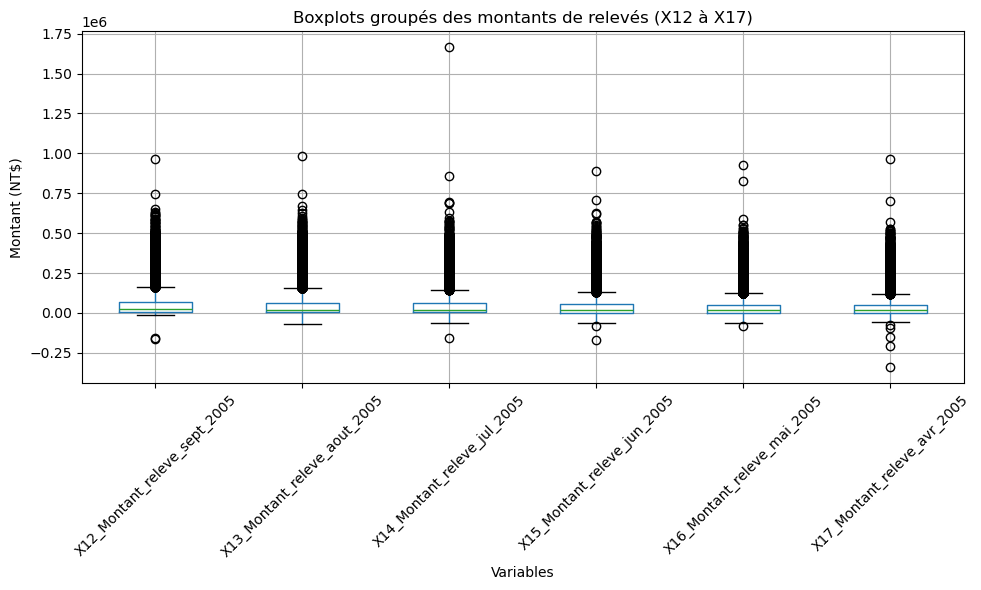

In [135]:
#Verification des outliers dans les variables x12 a x17
#boxplot des variales x12 a x17
# Liste des colonnes à analyser
import matplotlib.pyplot as plt

# Liste des colonnes des montants de relevés
colonnes_releves = [
    'X12_Montant_releve_sept_2005',
    'X13_Montant_releve_aout_2005',
    'X14_Montant_releve_jul_2005',
    'X15_Montant_releve_jun_2005',
    'X16_Montant_releve_mai_2005',
    'X17_Montant_releve_avr_2005'
]

plt.figure(figsize=(10, 6))

# Boxplot groupé à partir du DataFrame
df[colonnes_releves].boxplot()

plt.title("Boxplots groupés des montants de relevés (X12 à X17)")
plt.xlabel("Variables")
plt.ylabel("Montant (NT$)")
plt.xticks(rotation=45)  # pour pencher les noms de colonnes
plt.tight_layout()
plt.show()


L’analyse des boxplots groupés (X12 à X17) met en évidence une distribution très asymétrique des montants de factures mensuelles, caractérisée par une forte concentration de valeurs dans les montants faibles à moyens, et la présence de nombreux outliers extrêmement élevés.
On observe également des valeurs négatives, incohérentes avec la nature des montants de facturation, ce qui indique des erreurs de saisie.
Les médianes restent relativement stables d’un mois à l’autre, ce qui suggère un comportement de dépense similaire au fil du temps.
Un nettoyage des valeurs négatives et un traitement des outliers sont nécessaires avant la modélisation.

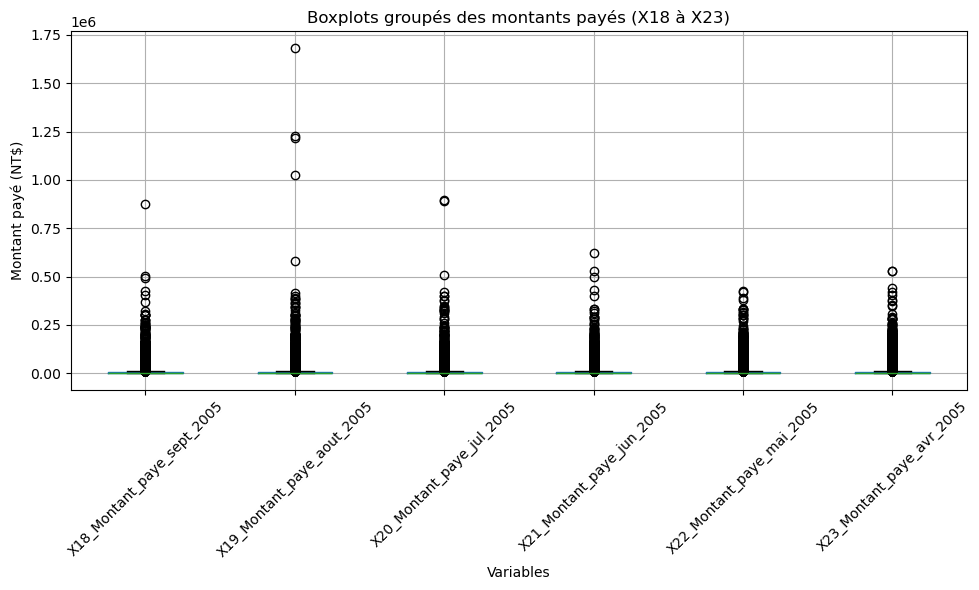

In [136]:
# detection des outliers des variables x18 a x23
import matplotlib.pyplot as plt

# Liste des colonnes pour les paiements précédents
colonnes_paiements = [
    'X18_Montant_paye_sept_2005',
    'X19_Montant_paye_aout_2005',
    'X20_Montant_paye_jul_2005',
    'X21_Montant_paye_jun_2005',
    'X22_Montant_paye_mai_2005',
    'X23_Montant_paye_avr_2005'
]

plt.figure(figsize=(10, 6))
df[colonnes_paiements].boxplot()

plt.title("Boxplots groupés des montants payés (X18 à X23)")
plt.xlabel("Variables")
plt.ylabel("Montant payé (NT$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Le boxplot des montants payés (X18 à X23) révèle une forte concentration de paiements dans les faibles valeurs, avec des médianes proches de zéro, ce qui indique que la majorité des clients effectuent des paiements minimums ou irréguliers.
On observe également la présence de nombreux outliers extrêmes, certains paiements atteignant plus d’un million de NT dollars. Ces valeurs aberrantes peuvent s'expliquer par des comportements financiers atypiques ou par des erreurs de saisie.
La distribution très asymétrique et la cohérence des patterns entre les mois suggèrent un comportement de remboursement stable dans le temps. Des traitements spécifiques des outliers seront nécessaires avant la modélisation.

In [137]:
# Gestion desoutliersd

# 1 Définition des colonnes X12 à X23
bill_cols = [
    'X12_Montant_releve_sept_2005',
    'X13_Montant_releve_aout_2005',
    'X14_Montant_releve_jul_2005',
    'X15_Montant_releve_jun_2005',
    'X16_Montant_releve_mai_2005',
    'X17_Montant_releve_avr_2005'
]

payment_cols = [
    'X18_Montant_paye_sept_2005',
    'X19_Montant_paye_aout_2005',
    'X20_Montant_paye_jul_2005',
    'X21_Montant_paye_jun_2005',
    'X22_Montant_paye_mai_2005',
    'X23_Montant_paye_avr_2005'
]

all_money_cols = bill_cols + payment_cols

# 2 Remplacer les valeurs négatives par 0 (impossible en finance)
df[all_money_cols] = df[all_money_cols].clip(lower=0)

# 3️ Winsorization au 99e percentile (cap des valeurs extrêmes)
for col in all_money_cols:
    cap = df[col].quantile(0.99)
    df[col] = df[col].clip(upper=cap)

# Vérification
df[all_money_cols].describe()



,X12_Montant_releve_sept_2005,X13_Montant_releve_aout_2005,X14_Montant_releve_jul_2005,X15_Montant_releve_jun_2005,X16_Montant_releve_mai_2005,X17_Montant_releve_avr_2005,X18_Montant_paye_sept_2005,X19_Montant_paye_aout_2005,X20_Montant_paye_jul_2005,X21_Montant_paye_jun_2005,X22_Montant_paye_mai_2005,X23_Montant_paye_avr_2005
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,50483.263741,48439.404906,46232.738962,42562.657667,39630.419222,38250.329818,5038.556649,5094.573936,4560.671884,4252.165660,4205.118972,4560.535959
std,69324.121020,66820.376039,64378.358409,60065.174280,56600.667083,55426.557458,9455.850747,10346.288290,9564.621793,9282.614134,9068.802062,11054.876678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3595.000000,3010.000000,2711.000000,2360.000000,1787.000000,1262.000000,1000.000000,850.000000,390.000000,300.000000,261.000000,131.000000
50%,22438.000000,21295.000000,20135.000000,19081.000000,18130.000000,17124.000000,2102.000000,2010.000000,1804.000000,1500.000000,1500.000000,1500.000000
75%,67260.000000,64109.000000,60201.000000,54601.000000,50247.000000,49252.000000,5008.000000,5000.000000,4512.000000,4016.000000,4042.000000,4000.000000
max,350134.480000,337505.080000,325254.040000,305006.720000,285879.880000,279577.160000,66843.480000,76651.720000,70000.000000,67139.840000,65627.160000,82760.800000


## Analyse statistisque

In [138]:
# === Statistiques descriptives générales ===
df.describe().T.style.background_gradient(cmap='Blues').format("{:.2f}")


# Plusieurs autres tableaux si besoin ↓
# display(df.corr().round(2))     # matrice de corrélations
# print(df.skew().round(2))       # asymétrie
# print(df.kurt().round(2))       # kurtosis / aplatissement


,count,mean,std,min,25%,50%,75%,max
X1_Montant_credit_NT,29965.00,167442.01,129760.14,10000.00,50000.00,140000.00,240000.00,1000000.00
X2_Sexe,29965.00,1.60,0.49,1.00,1.00,2.00,2.00,2.00
X3_Education,29965.00,1.84,0.74,1.00,1.00,2.00,2.00,4.00
X4_Etat_civil,29965.00,1.56,0.52,1.00,1.00,2.00,2.00,3.00
X5_Age,29965.00,35.49,9.22,21.00,28.00,34.00,41.00,79.00
X6_Statut_paiement_sept_2005,29965.00,-0.42,1.14,-1.00,-1.00,-1.00,-1.00,8.00
X7_Statut_paiement_aout_2005,29965.00,-0.53,1.15,-1.00,-1.00,-1.00,-1.00,8.00
X8_Statut_paiement_jul_2005,29965.00,-0.56,1.13,-1.00,-1.00,-1.00,-1.00,8.00
X9_Statut_paiement_jun_2005,29965.00,-0.62,1.07,-1.00,-1.00,-1.00,-1.00,8.00
X10_Statut_paiement_mai_2005,29965.00,-0.68,1.00,-1.00,-1.00,-1.00,-1.00,8.00


Le tableau met en évidence un dataset volumineux, sans valeurs manquantes, caractérisé par une forte variabilité des données financières et une distribution plus stable des variables socio-démographiques. Les écarts importants entre les montants dus et payés suggèrent des comportements hétérogènes face au remboursement

## Analyse Univarie 

In [139]:
# on commence par la variable cible Y_DEFAUT
df['Y_DEFAUT'].value_counts()
df['Y_DEFAUT'].value_counts(normalize=True).round(3)


Y_DEFAUT
0    0.779
1    0.221
Name: proportion, dtype: float64

<Axes: xlabel='Y_DEFAUT', ylabel='count'>

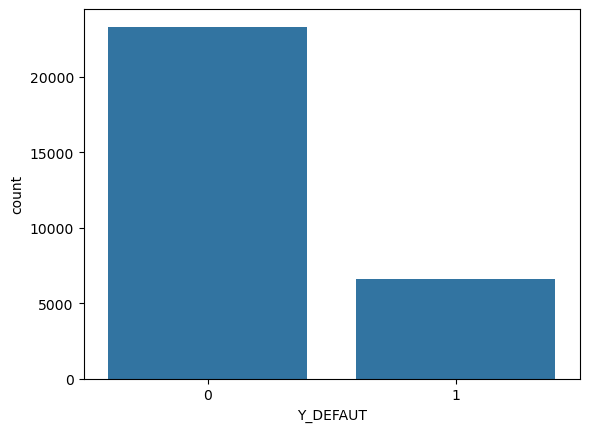

In [140]:
import seaborn as sns
sns.countplot(x=df['Y_DEFAUT'])


La variable cible Y montre une distribution binaire déséquilibrée.
Environ 78% des clients n’ont pas fait défaut (Y=0), tandis que 22% sont en situation de défaut (Y=1).
Ce déséquilibre est important car il implique l’utilisation de techniques adaptées (class weights, SMOTE) lors de la modélisation afin d’éviter qu’un modèle trivial prédise systématiquement “pas de défaut”.

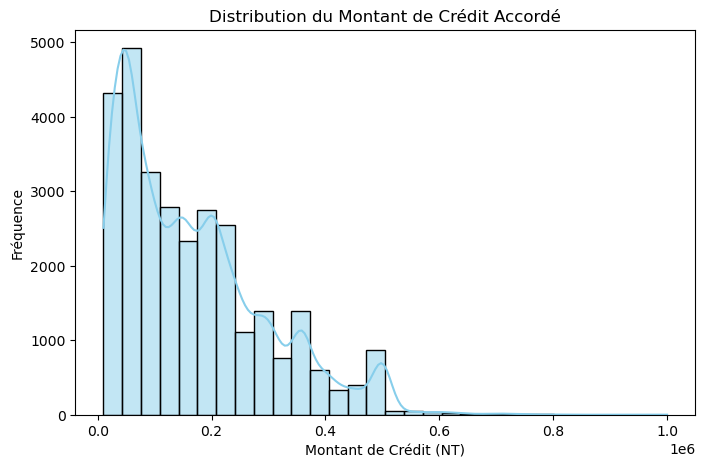

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation du montant de crédit accordé
plt.figure(figsize=(8, 5))
sns.histplot(df['X1_Montant_credit_NT'], bins=30, kde=True, color='skyblue')
plt.title('Distribution du Montant de Crédit Accordé')
plt.xlabel('Montant de Crédit (NT)')
plt.ylabel('Fréquence')
plt.show()

La distribution du montant de crédit accordé révèle une forte asymétrie positive, indiquant que la majorité des clients contractent des prêts de faible à moyen montant, tandis que de rares individus accèdent à des niveaux de financement beaucoup plus élevés.

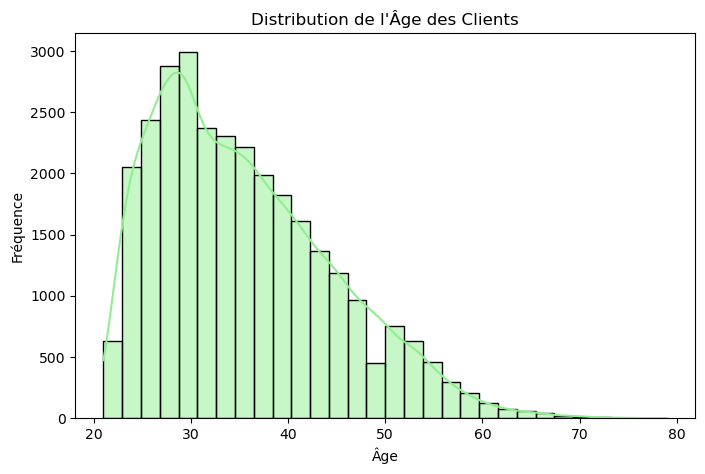

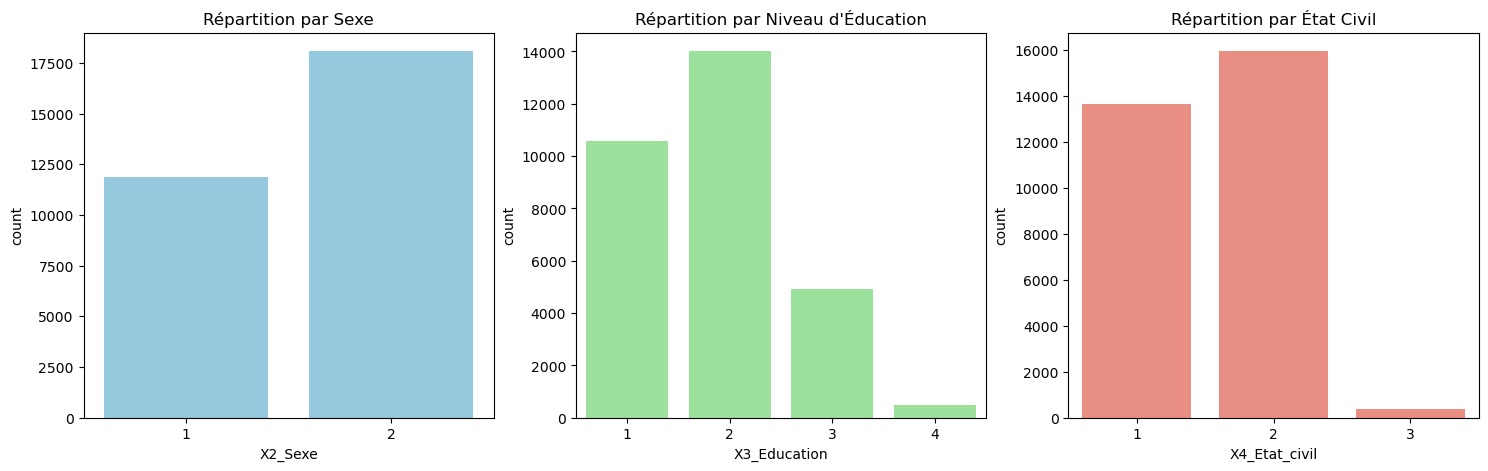

In [142]:

#Visaualisation de la distribution de la variable age
plt.figure(figsize=(8, 5))
sns.histplot(df['X5_Age'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution de l\'Âge des Clients')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

# Visualisation des variables sociodemographiques
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(ax=axes[0], data=df, x='X2_Sexe', color='skyblue')
axes[0].set_title('Répartition par Sexe')
sns.countplot(ax=axes[1], data=df, x='X3_Education', color='lightgreen')
axes[1].set_title('Répartition par Niveau d\'Éducation')
sns.countplot(ax=axes[2], data=df, x='X4_Etat_civil', color='salmon')
axes[2].set_title('Répartition par État Civil')
plt.show()

- **Age**:  L’histogramme montre que la population étudiée est majoritairement adulte jeune, avec une concentration autour de 28 à 35 ans, zone correspondant au pic d’effectifs. La distribution présente une asymétrie à droite, ce qui indique que les profils plus âgés sont progressivement moins représentés.

- **Sexe**: La variable sexe est distribuée de manière déséquilibrée, avec une prédominance du groupe "2", représentant environ 60 % des individus, contre 40 % pour le groupe "1".

- **Education** : La distribution est fortement concentrée sur trois catégories : 2, suivi de 1, puis 3

- **État civil**: Les états civils les plus représentés sont les catégories 1 et 2, qui constituent à eux deux la quasi-totalité de l’échantillon. Les modalités 0 et 3 représentent une part faible mais existante.

In [143]:
pay_cols = [
    'X6_Statut_paiement_sept_2005',
    'X7_Statut_paiement_aout_2005',
    'X8_Statut_paiement_jul_2005',
    'X9_Statut_paiement_jun_2005',
    'X10_Statut_paiement_mai_2005',
    'X11_Statut_paiement_avr_2005'
]


In [144]:
# Analyse statistique des frequences des statuts de paiement
for col in pay_cols:
    print(f"\nDistribution de {col} :")
    print(df[col].value_counts().sort_index())



Distribution de X6_Statut_paiement_sept_2005 :
X6_Statut_paiement_sept_2005
-1    23169
 1     3667
 2     2666
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64

Distribution de X7_Statut_paiement_aout_2005 :
X7_Statut_paiement_aout_2005
-1    25528
 1       28
 2     3926
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: count, dtype: int64

Distribution de X8_Statut_paiement_jul_2005 :
X8_Statut_paiement_jul_2005
-1    25753
 1        4
 2     3819
 3      240
 4       75
 5       21
 6       23
 7       27
 8        3
Name: count, dtype: int64

Distribution de X9_Statut_paiement_jun_2005 :
X9_Statut_paiement_jun_2005
-1    26456
 1        2
 2     3159
 3      180
 4       68
 5       35
 6        5
 7       58
 8        2
Name: count, dtype: int64

Distribution de X10_Statut_paiement_mai_2005 :
X10_Statut_paiement_mai_2005
-1    26998
 2     2626
 3      178
 4       83
 5       17
 6        4
 7       58

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\1420434881.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax, palette='Blues')
C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\1420434881.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax, palette='Blues')
C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\1420434881.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax, palette='Blues')
C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\1420434881.py:8: FutureWarning: 

Passing `pale

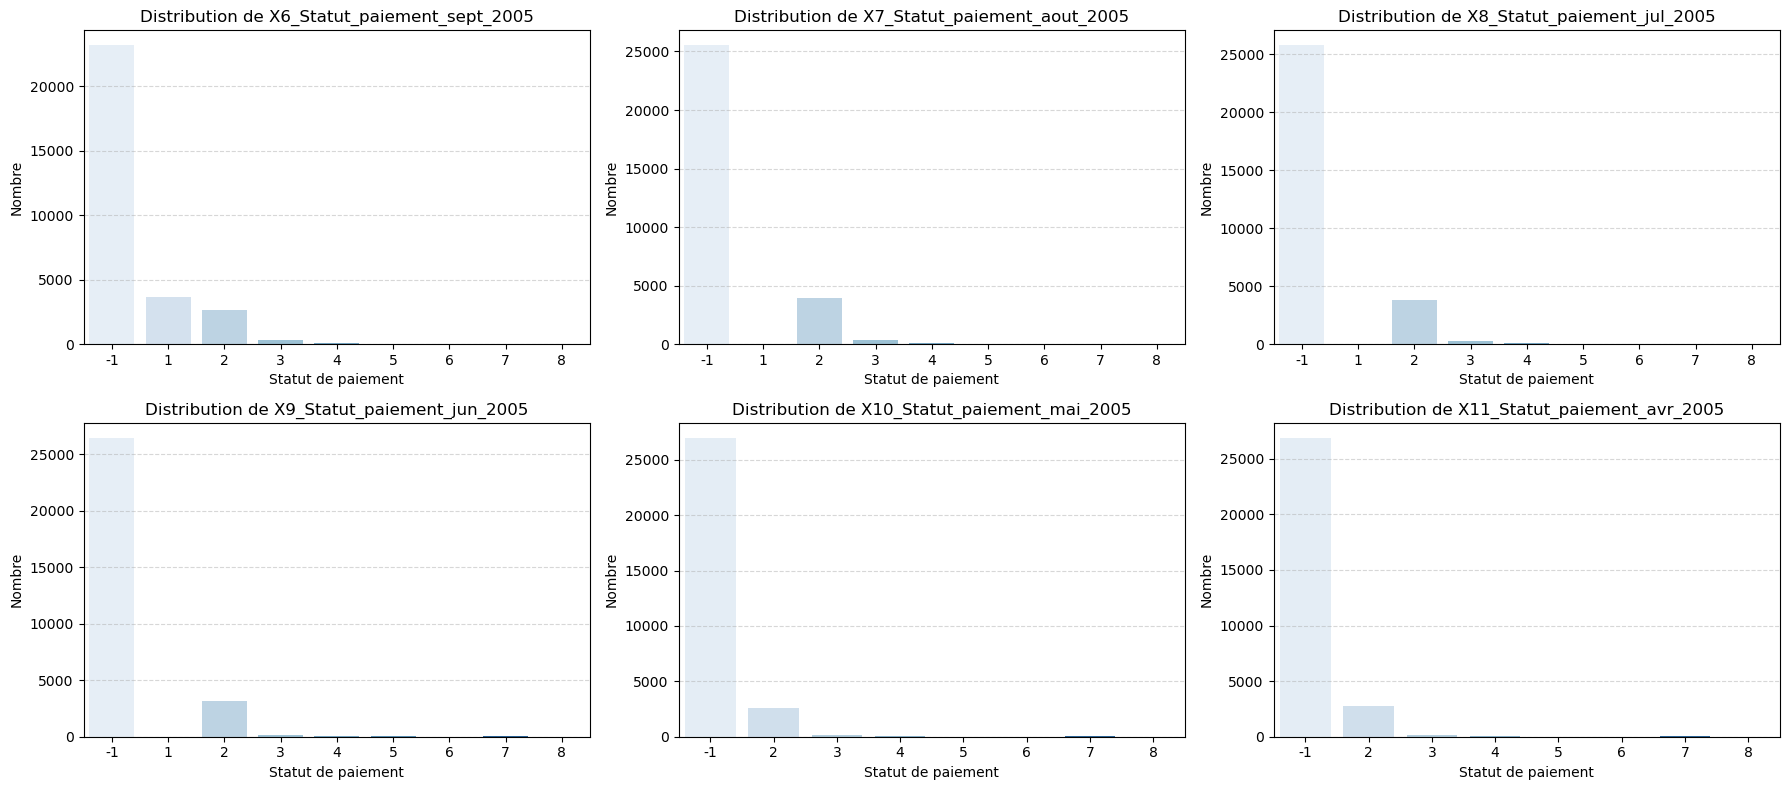

In [145]:
# Visualisation univariee
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 8))

for ax, col in zip(axes.flatten(), pay_cols):
    sns.countplot(x=df[col], ax=ax, palette='Blues')
    ax.set_title(f"Distribution de {col}")
    ax.set_xlabel("Statut de paiement")
    ax.set_ylabel("Nombre")
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


L’analyse univariée des variables X6 à X11 montre que la grande majorité des clients effectuent leurs paiements à temps (statut –1), représentant plus de 80% de l’échantillon chaque mois. Les retards légers (statut 1) sont relativement fréquents et constituent le premier niveau de risque, sans toutefois être un indicateur direct de défaut.

Les retards sévères (statuts ≥2) sont rares mais apparaissent de manière croissante dans les mois les plus récents (X6 et X7), ce qui traduit une détérioration progressive du comportement de paiement. Ces retards prolongés sont des signaux forts et constituent les variables les plus déterminantes dans la prédiction du défaut.

Globalement, ces six variables capturent efficacement la dynamique de remboursement des clients et joueront un rôle central dans la modélisation prédictive.

In [146]:
bill_cols = [
    'X12_Montant_releve_sept_2005',
    'X13_Montant_releve_aout_2005',
    'X14_Montant_releve_jul_2005',
    'X15_Montant_releve_jun_2005',
    'X16_Montant_releve_mai_2005',
    'X17_Montant_releve_avr_2005'
]



In [147]:
# Statistique descriptives
df[bill_cols].describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
X12_Montant_releve_sept_2005,29965.0,50483.26,69324.12,0.0,3595.0,22438.0,67260.0,350134.48
X13_Montant_releve_aout_2005,29965.0,48439.40,66820.38,0.0,3010.0,21295.0,64109.0,337505.08
X14_Montant_releve_jul_2005,29965.0,46232.74,64378.36,0.0,2711.0,20135.0,60201.0,325254.04
X15_Montant_releve_jun_2005,29965.0,42562.66,60065.17,0.0,2360.0,19081.0,54601.0,305006.72
X16_Montant_releve_mai_2005,29965.0,39630.42,56600.67,0.0,1787.0,18130.0,50247.0,285879.88
X17_Montant_releve_avr_2005,29965.0,38250.33,55426.56,0.0,1262.0,17124.0,49252.0,279577.16


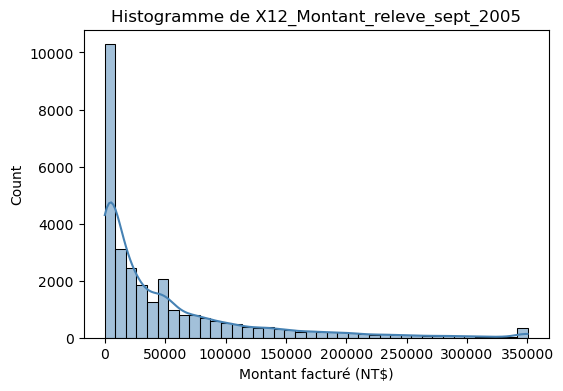

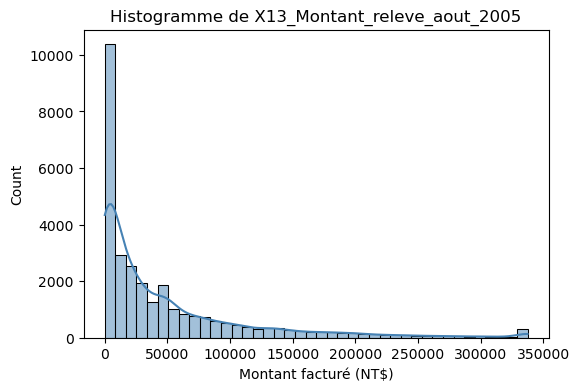

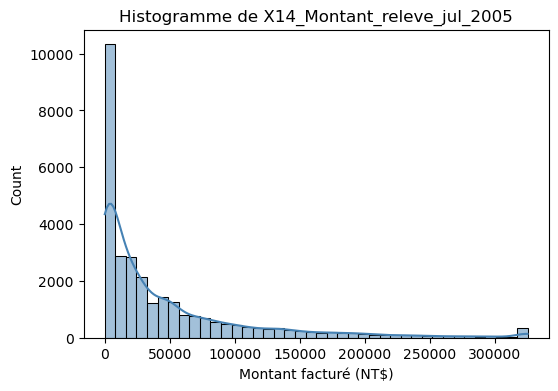

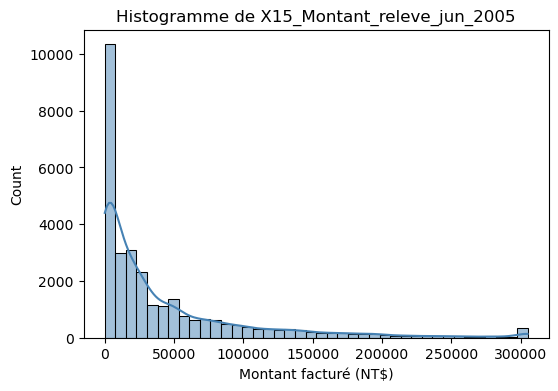

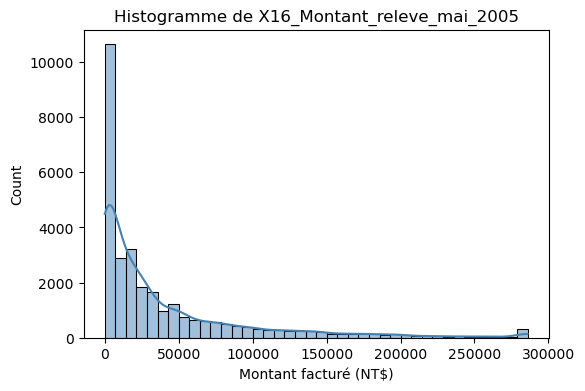

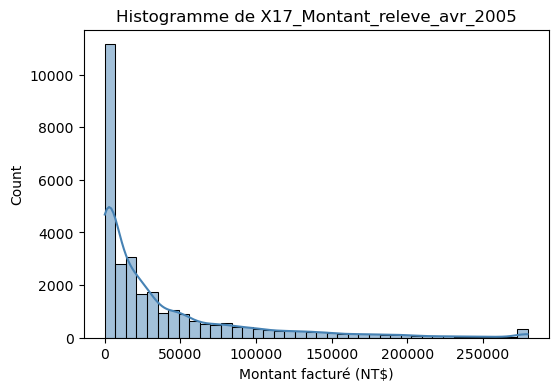

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in bill_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=40, kde=True, color='steelblue')
    plt.title(f"Histogramme de {col}")
    plt.xlabel("Montant facturé (NT$)")
    plt.show()


En résumé, les variables X12 à X17 montrent une concentration de montants modérés, une asymétrie marquée due à quelques montants très élevés et une stabilité dans le temps. Elles jouent un rôle central dans l’évaluation de la charge financière des clients et contribueront de manière significative à la modélisation du risque de défaut.

In [149]:
payment_cols = [
    'X18_Montant_paye_sept_2005',
    'X19_Montant_paye_aout_2005',
    'X20_Montant_paye_jul_2005',
    'X21_Montant_paye_jun_2005',
    'X22_Montant_paye_mai_2005',
    'X23_Montant_paye_avr_2005'
]


In [150]:
# Resume desctiptif
df[payment_cols].describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
X18_Montant_paye_sept_2005,29965.0,5038.56,9455.85,0.0,1000.0,2102.0,5008.0,66843.48
X19_Montant_paye_aout_2005,29965.0,5094.57,10346.29,0.0,850.0,2010.0,5000.0,76651.72
X20_Montant_paye_jul_2005,29965.0,4560.67,9564.62,0.0,390.0,1804.0,4512.0,70000.00
X21_Montant_paye_jun_2005,29965.0,4252.17,9282.61,0.0,300.0,1500.0,4016.0,67139.84
X22_Montant_paye_mai_2005,29965.0,4205.12,9068.80,0.0,261.0,1500.0,4042.0,65627.16
X23_Montant_paye_avr_2005,29965.0,4560.54,11054.88,0.0,131.0,1500.0,4000.0,82760.80


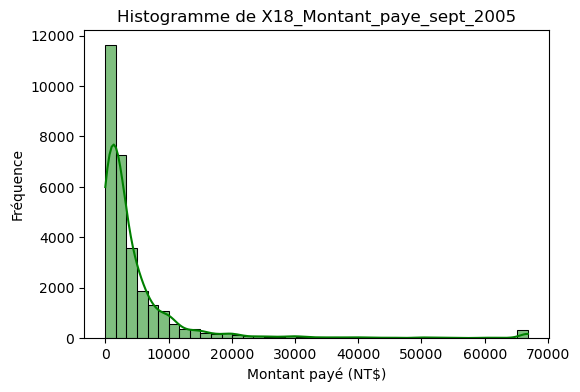

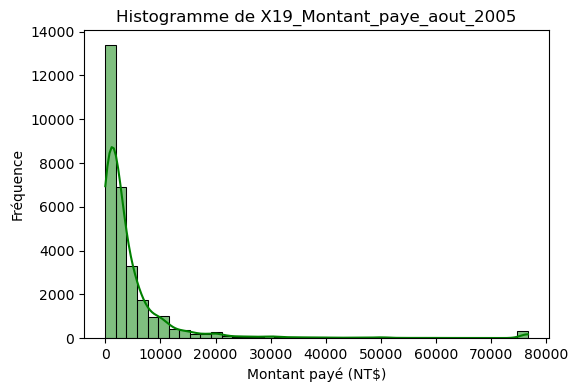

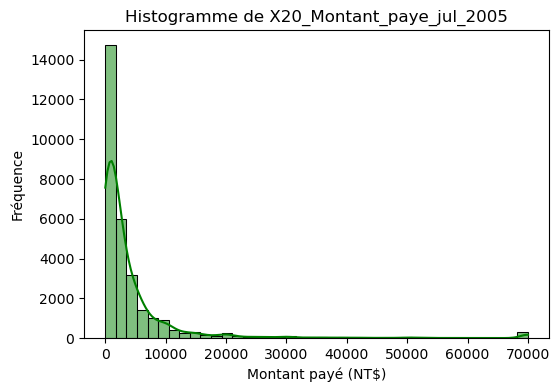

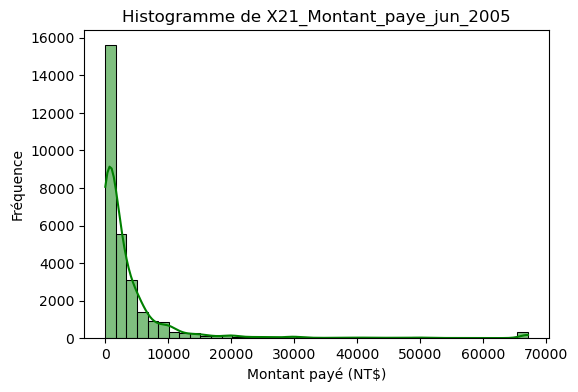

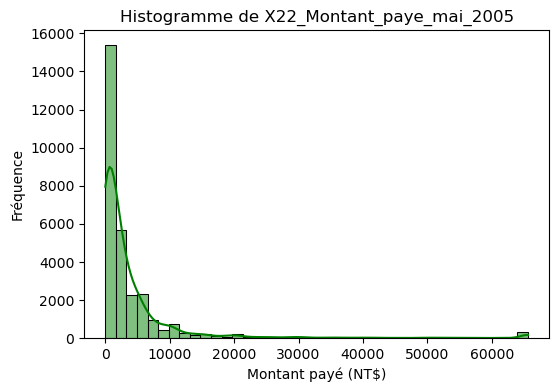

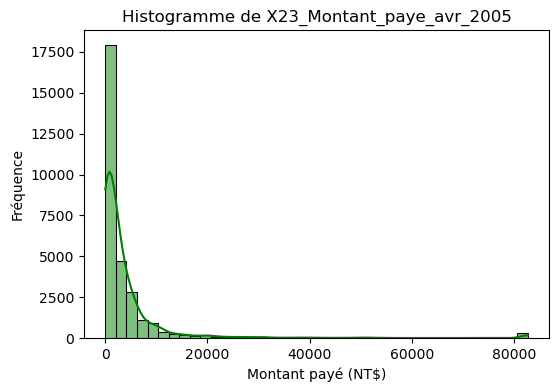

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in payment_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=40, kde=True, color='green')
    plt.title(f"Histogramme de {col}")
    plt.xlabel("Montant payé (NT$)")
    plt.ylabel("Fréquence")
    plt.show()


Les variables X18 à X23 représentent les montants effectivement payés par les clients au cours des six derniers mois (d’avril à septembre 2005). Leur distribution fournit des informations clés sur le comportement de remboursement.

1. Les histogrammes montrent une distribution fortement asymétrique.
La grande majorité des paiements est comprise entre 0 et 20 000 NT, avec une concentration très élevée autour de faibles montants.
Cela indique que de nombreux clients ne paient que des montants minimaux ou partiels.

2. Les médianes sont très basses, ce qui signifie que la plupart des clients effectuent des paiements faibles comparés à leurs factures (X12–X17).

3. Les boxplots révèlent la présence d’importants outliers, avec des paiements pouvant dépasser plusieurs centaines de milliers, voire plus d’un million de NT.
Ces outliers ont été gérés lors du nettoyage (winsorisation), mais leur présence initiale reflète des comportements de remboursement exceptionnellement élevés ou des anomalies de saisie.

4. Les six mois présentent des distributions similaires, ce qui suggère une constance dans les comportements :
les clients qui paient peu continuent de payer peu, et les clients qui paient beaucoup restent dans des montants plus élevés.

5. Les valeurs nulles (paiement = 0) sont fréquentes, surtout chez les clients en difficulté.
Ces absences de paiement sont souvent associées à un risque accru de défaut dans les mois qui suivent.

En résumé, les montants payés X18–X23 révèlent un comportement marqué par des paiements faibles ou irréguliers pour une majorité de clients, combiné à quelques paiements très élevés. Ces variables sont essentielles pour comprendre la capacité réelle du client à rembourser et constituent un élément clé de la modélisation du risque de défaut.

********************************************************************************************************************************************

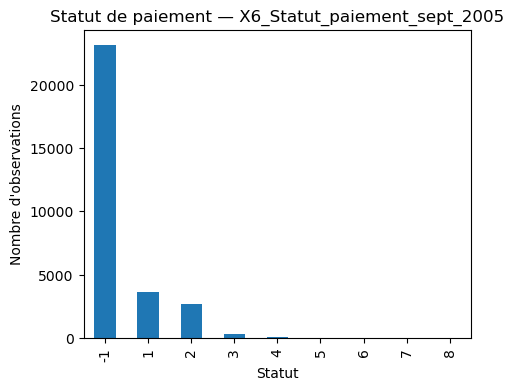

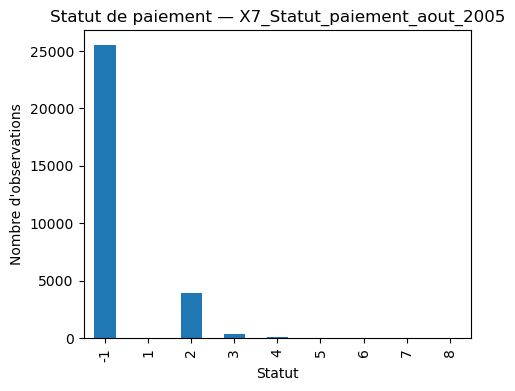

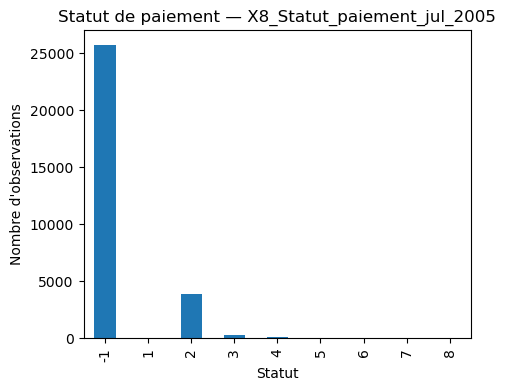

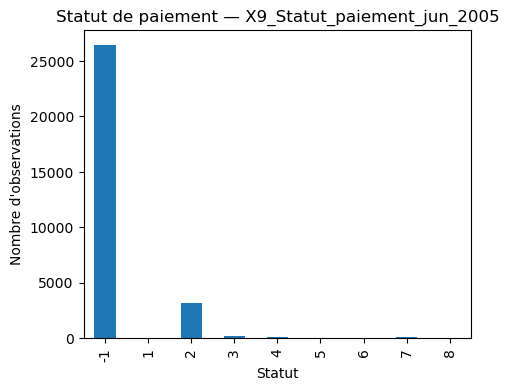

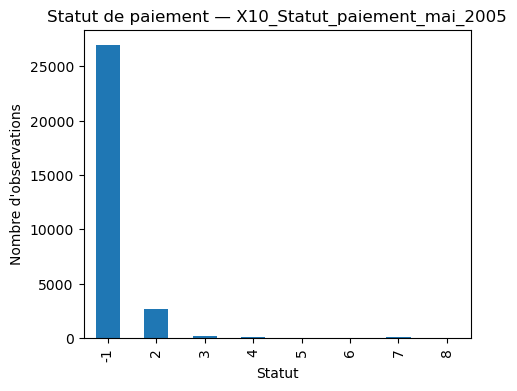

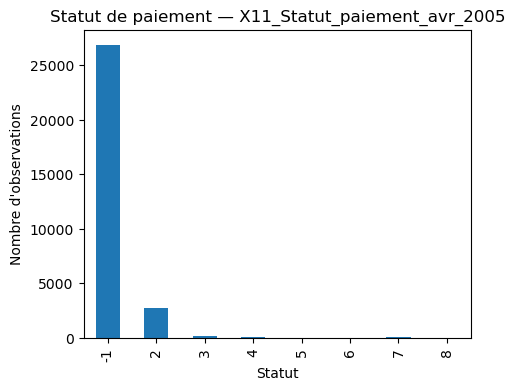

In [152]:
# Visualisation des statuts de paiement
statut_cols = [
    'X6_Statut_paiement_sept_2005',
    'X7_Statut_paiement_aout_2005',
    'X8_Statut_paiement_jul_2005',
    'X9_Statut_paiement_jun_2005',
    'X10_Statut_paiement_mai_2005',
    'X11_Statut_paiement_avr_2005'
]

for col in statut_cols:
    plt.figure(figsize=(5,4))
    df[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f"Statut de paiement — {col}")
    plt.xlabel("Statut")
    plt.ylabel("Nombre d'observations")
    plt.show()


Les six histogrammes traduisent la fréquence des différents niveaux de statut de paiement pour chaque mois. On observe une structure similaire dans toutes les distributions, ce qui permet de dégager des tendances générales. La distribution est très asymétrique, dominée par les paiements effectués à temps (statut 0), suivis de retards légers (1 à 2 mois). Les retards lourds existent mais demeurent rares

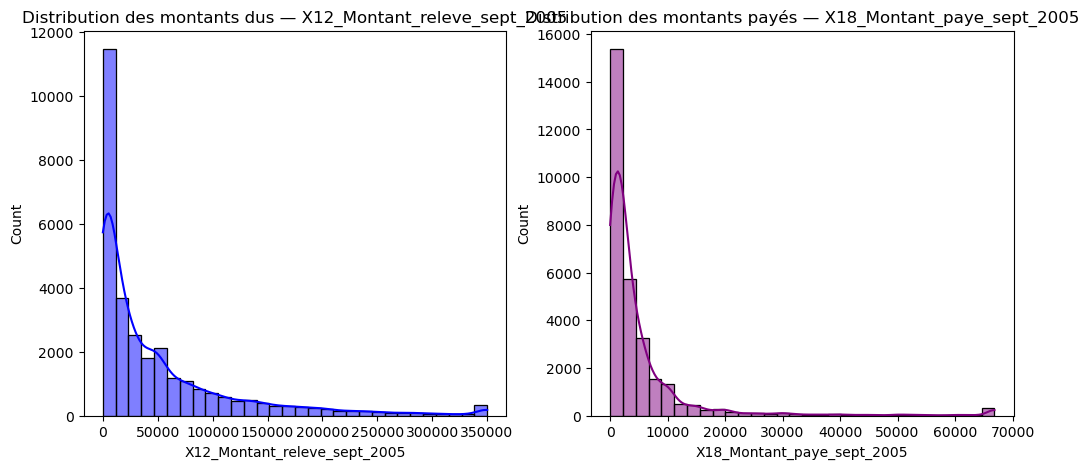

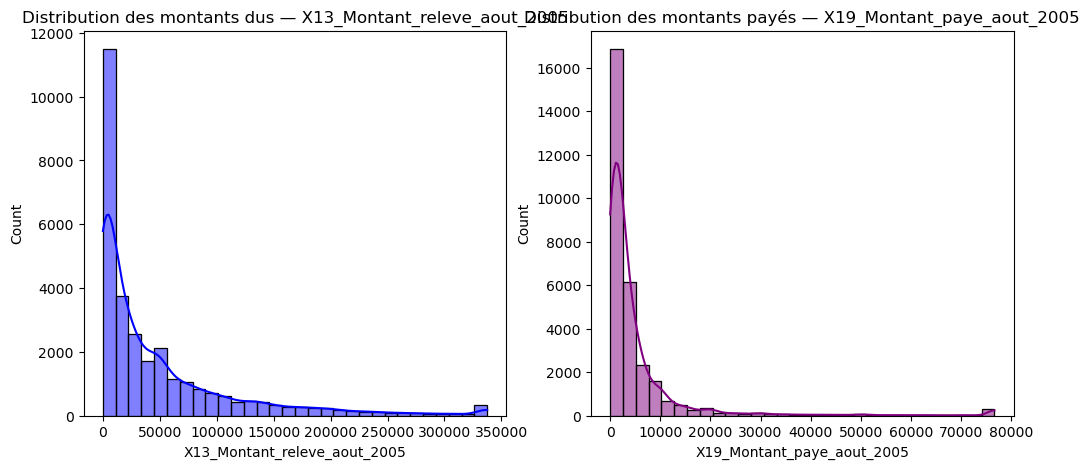

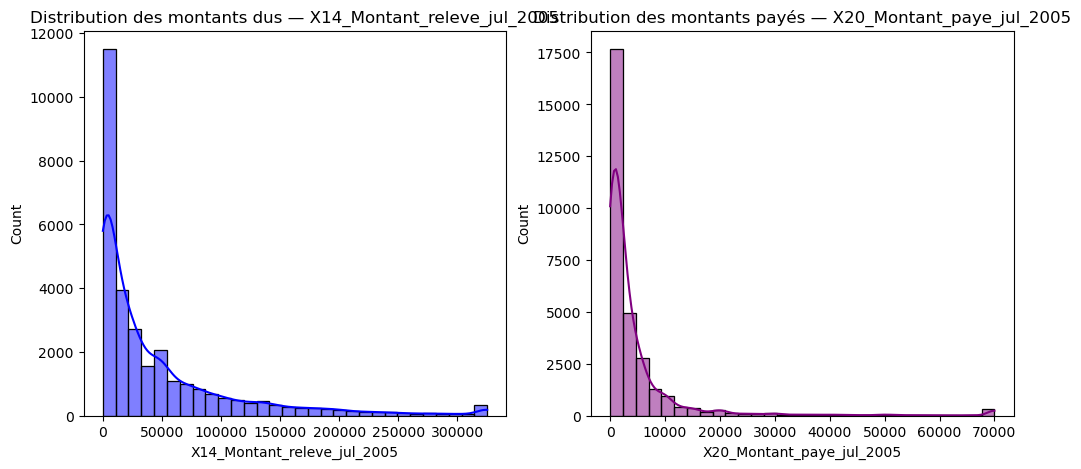

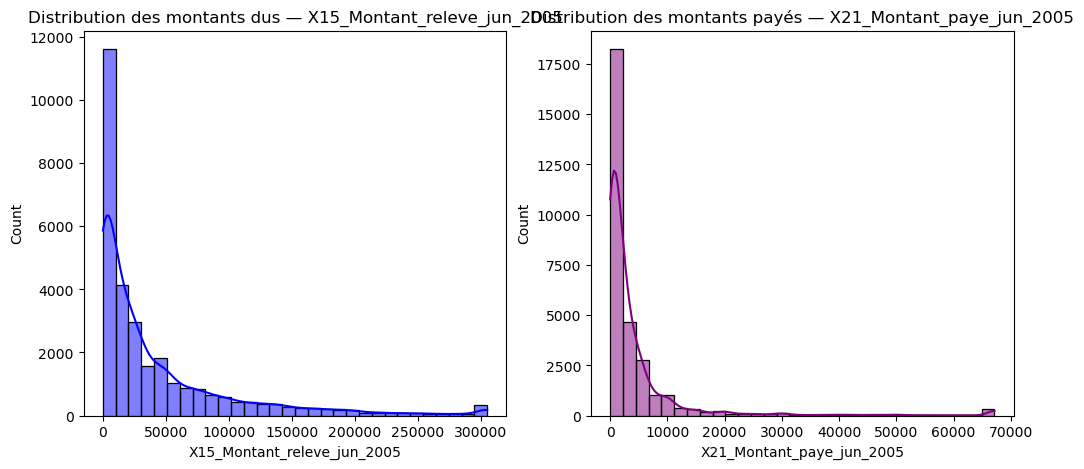

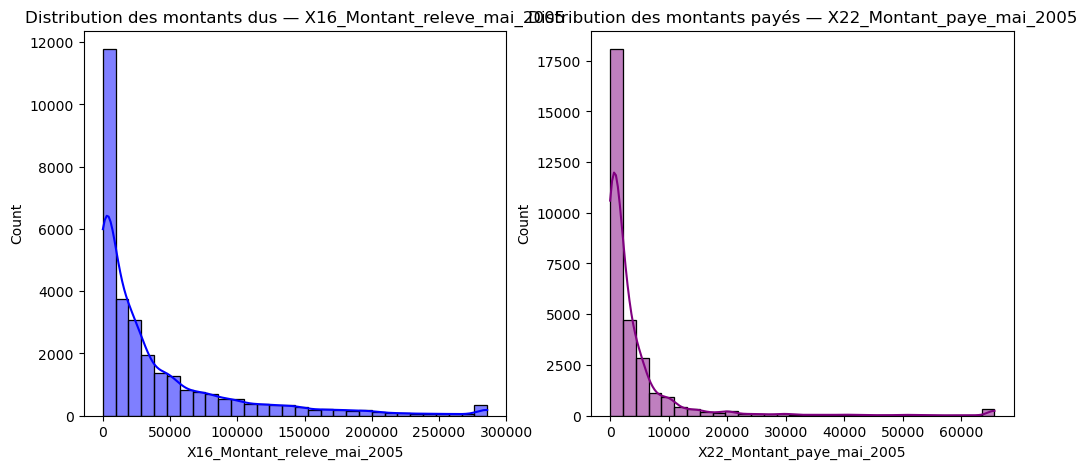

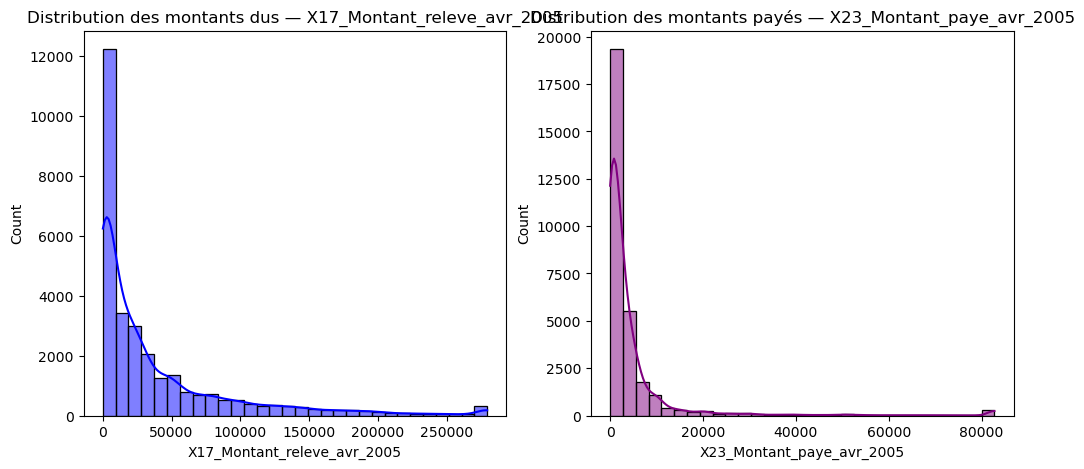

In [153]:
# Visualisation des montants dus et des payés
montant_dues_cols = [
    'X12_Montant_releve_sept_2005',
    'X13_Montant_releve_aout_2005',
    'X14_Montant_releve_jul_2005',
    'X15_Montant_releve_jun_2005',
    'X16_Montant_releve_mai_2005',
    'X17_Montant_releve_avr_2005'
]
montant_paye_cols = [
    'X18_Montant_paye_sept_2005',
    'X19_Montant_paye_aout_2005',
    'X20_Montant_paye_jul_2005',
    'X21_Montant_paye_jun_2005',
    'X22_Montant_paye_mai_2005',
    'X23_Montant_paye_avr_2005'
]
for due_col, paye_col in zip(montant_dues_cols, montant_paye_cols):
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[due_col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution des montants dus — {due_col}')
    plt.subplot(1, 2, 2)
    sns.histplot(df[paye_col], bins=30, kde=True, color='purple')
    plt.title(f'Distribution des montants payés — {paye_col}')
    plt.show()

Les distributions montrent une forte concentration sur de faibles montants dus et payés, traduisant un comportement régulier pour la majorité des clients. Cependant, les queues longues constatées dans les deux séries mettent en évidence des valeurs extrêmes correspondant à des charges financières élevées.
Les paiements apparaissent globalement inférieurs aux montants dus, ce qui peut constituer un facteur de déséquilibre financier et potentiellement conduire au défaut de remboursement.

**********************************************************************************************************************************************************

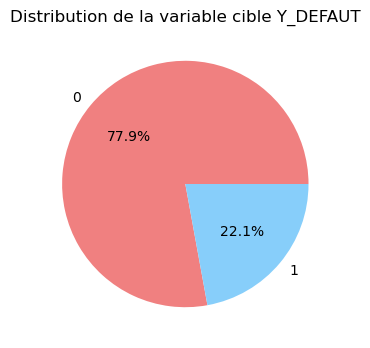

In [154]:
# Visualisation de la distribution de la variable cible
plt.figure(figsize=(6,4))
df['Y_DEFAUT'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution de la variable cible Y_DEFAUT')
plt.ylabel('')
plt.show()

La variable cible présente une majorité de clients 0 (≈78 %) contre 22 % de clients 1. Cette configuration traduit un léger déséquilibre des classes.

## Analyse bivariée 

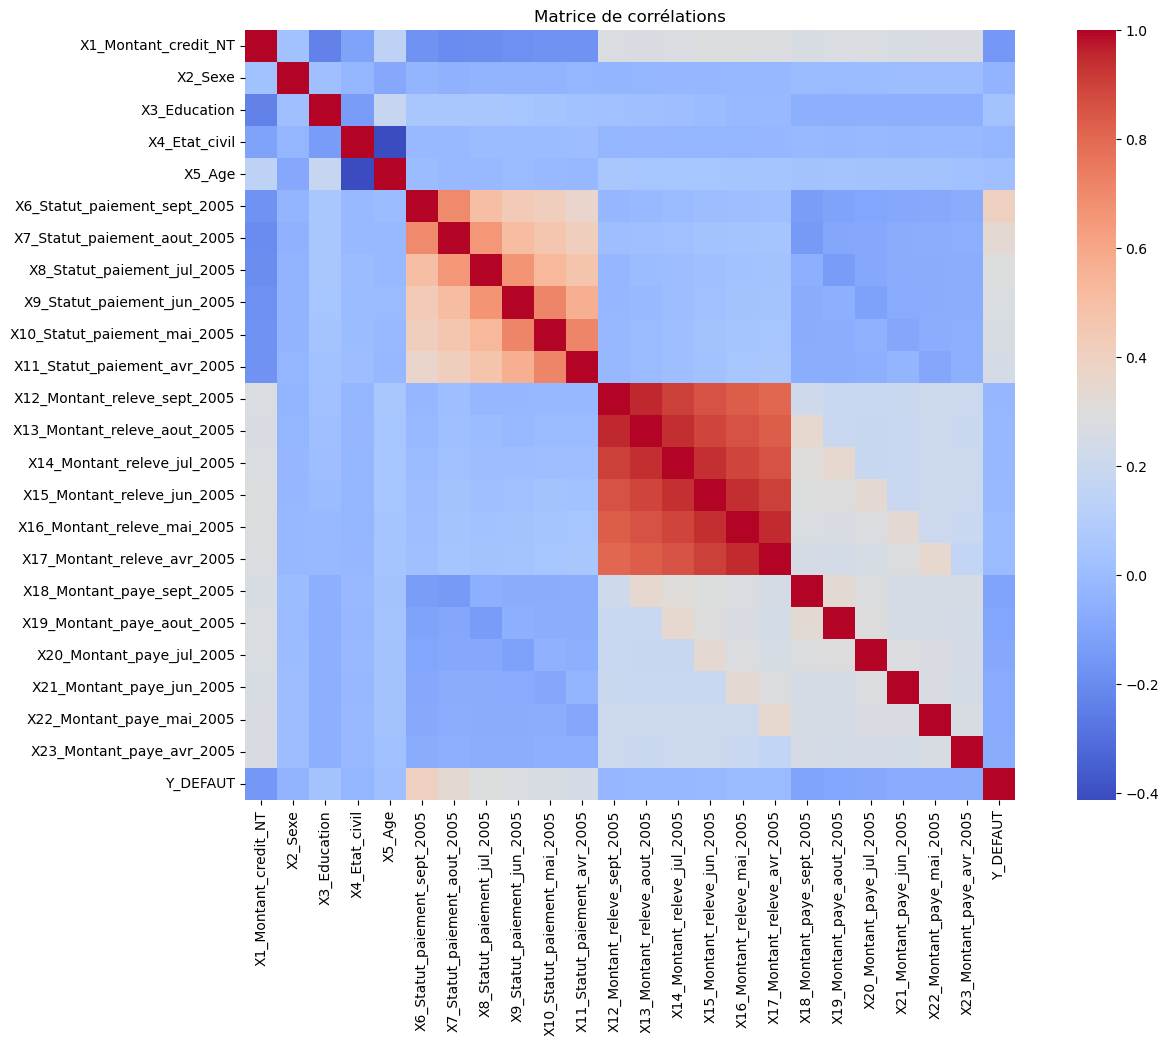

In [155]:
# --- Analyse bivariée avancée ---
# Heatmap des corrélations
import seaborn as sns
plt.figure(figsize=(16,10))
corr = df.corr()
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matrice de corrélations")
plt.show()

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\3670117687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set2')


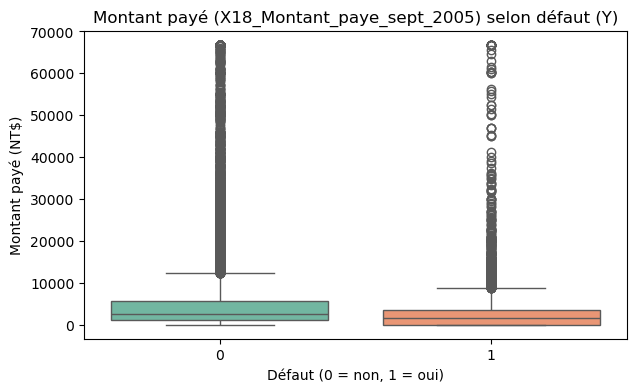

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\3670117687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set2')


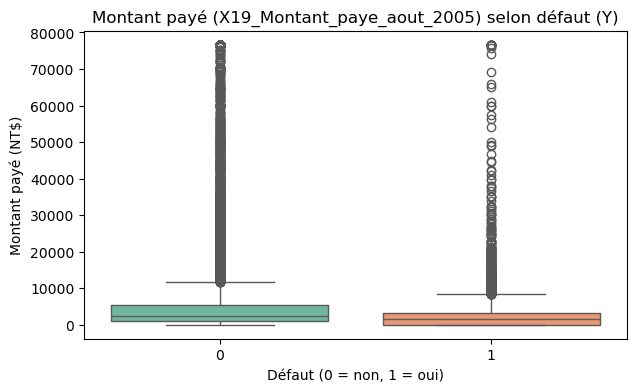

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\3670117687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set2')


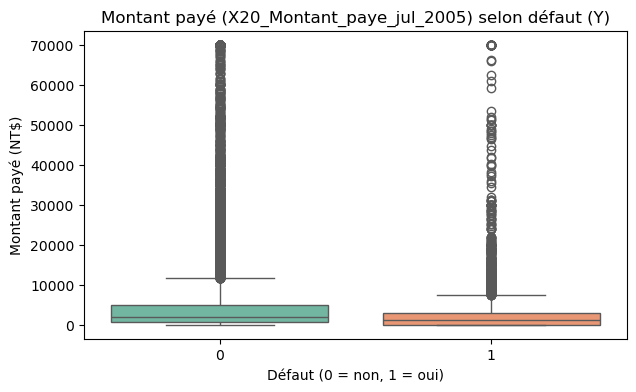

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\3670117687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set2')


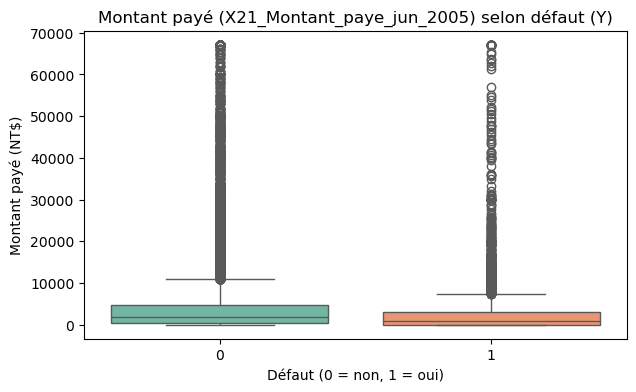

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\3670117687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set2')


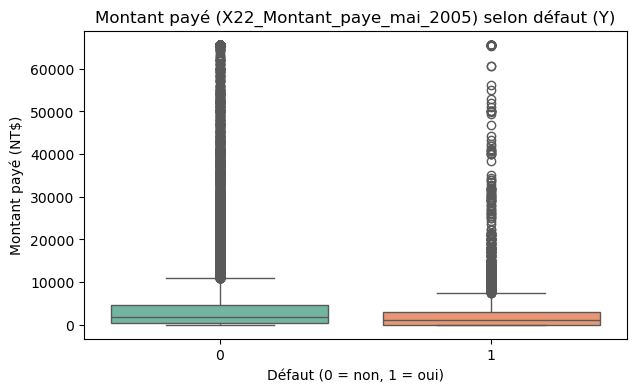

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\3670117687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set2')


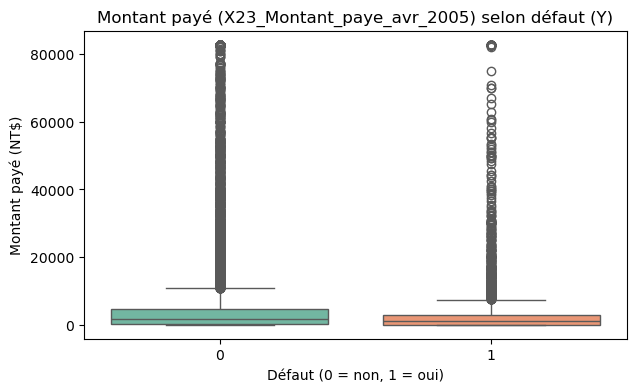

In [156]:
# analyse bivariee entre les montants payes et la cible
# Objectif: Comparer les montants payés entre :Y = 0 (pas de défaut) Y = 1 (défaut)

import seaborn as sns
import matplotlib.pyplot as plt

for col in payment_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set2')
    plt.title(f"Montant payé ({col}) selon défaut (Y)")
    plt.xlabel("Défaut (0 = non, 1 = oui)")
    plt.ylabel("Montant payé (NT$)")
    plt.show()


X18 — Montant payé en septembre 2005

Les clients en défaut paient très peu en septembre.
La médiane est nettement inférieure à celle des clients non défaillants.
Les paiements nuls sont très fréquents chez Y=1, indiquant un début de rupture du paiement.

X19 — Montant payé en août 2005

Le même schéma s’observe : les clients en défaut paient beaucoup moins.
Le groupe Y=1 présente une forte concentration de paiements proches de zéro.
Les paiements élevés (>20 000 NT) sont presque absents chez les clients en défaut.

X20 — Montant payé en juillet 2005

Les différences sont encore visibles : les clients non défaillants montrent une distribution plus étendue et une médiane plus élevée.
Les clients en défaut ont une distribution écrasée vers les faibles montants.

X21 — Montant payé en juin 2005

Pour ce mois également, les paiements des clients en défaut restent très bas.
Cela confirme que le défaut n’est pas soudain : il est précédé par plusieurs mois de paiements insuffisants ou nuls.

X22 — Montant payé en mai 2005

L’écart entre les groupes demeure important et constant.
La majorité des clients en défaut paient peu ou rien, montrant un comportement d’endettement prolongé.

X23 — Montant payé en avril 2005

Le schéma est encore présent sur cette période plus ancienne.
Même en avril, plusieurs mois avant la période critique, les clients en défaut présentent déjà des montants payés plus bas.

Conclusion sur X18 → X23

L’ensemble des analyses bivariées entre les montants payés et le défaut (X18 à X23 vs Y) montre une relation très forte et cohérente.
Les clients en défaut paient systématiquement moins que les clients non défaillants, et de nombreux paiements nuls apparaissent dans ce groupe.
Cette tendance est stable sur les six mois observés, ce qui fait des montants payés un excellent indicateur du risque de défaut.
Ces variables seront des prédicteurs essentiels dans la construction du modèle.

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\1055528800.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set3')


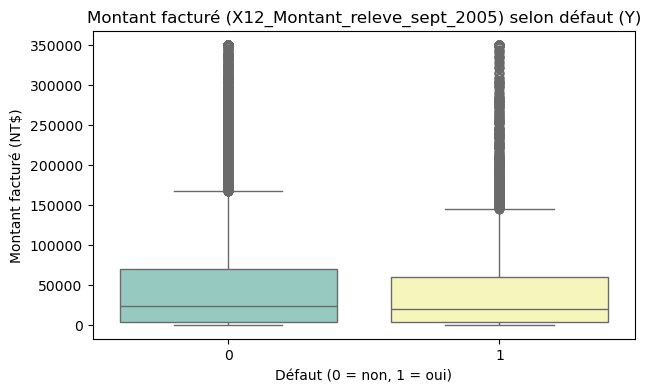

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\1055528800.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set3')


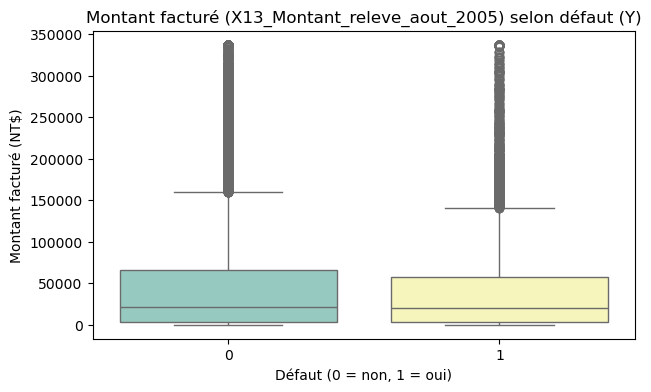

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\1055528800.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set3')


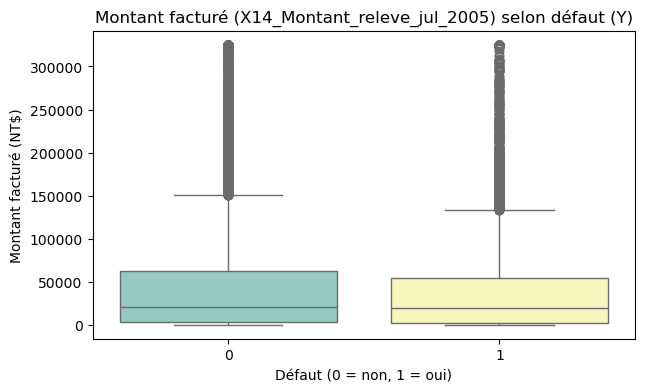

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\1055528800.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set3')


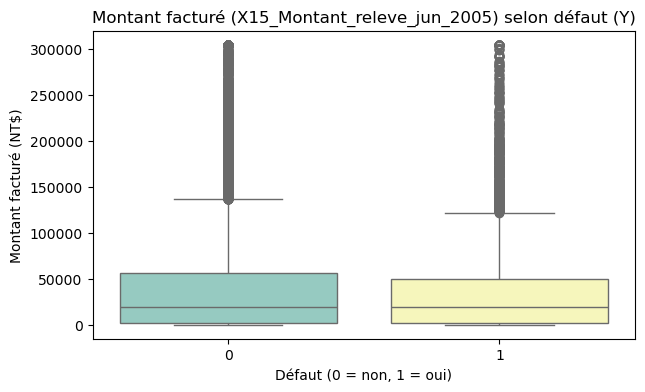

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\1055528800.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set3')


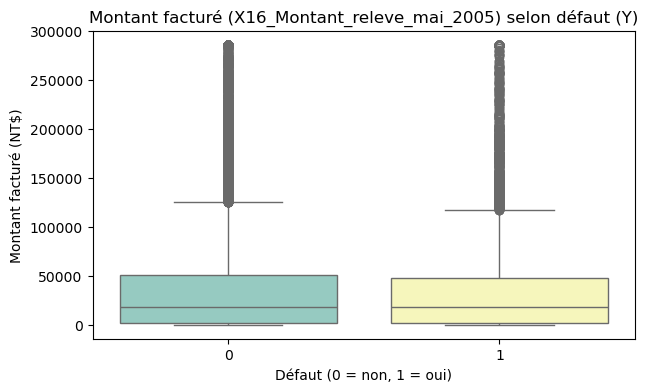

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\1055528800.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set3')


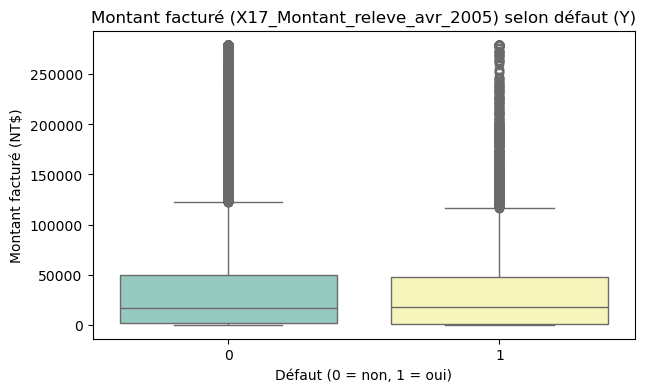

In [157]:
bill_cols = [
    'X12_Montant_releve_sept_2005',
    'X13_Montant_releve_aout_2005',
    'X14_Montant_releve_jul_2005',
    'X15_Montant_releve_jun_2005',
    'X16_Montant_releve_mai_2005',
    'X17_Montant_releve_avr_2005'
]
import seaborn as sns
import matplotlib.pyplot as plt

for col in bill_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set3')
    plt.title(f"Montant facturé ({col}) selon défaut (Y)")
    plt.xlabel("Défaut (0 = non, 1 = oui)")
    plt.ylabel("Montant facturé (NT$)")
    plt.show()


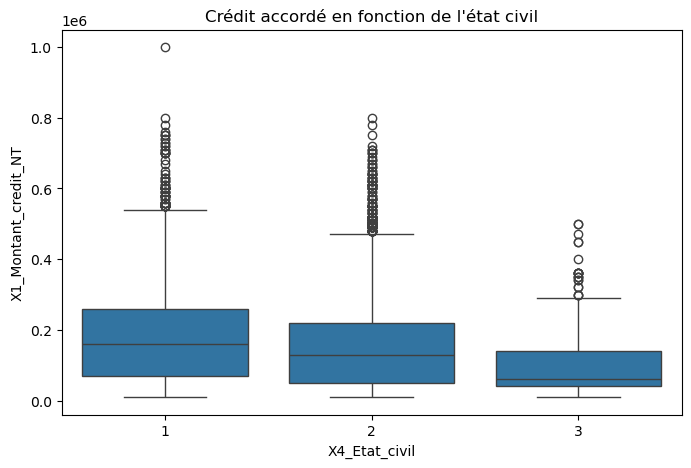

In [158]:
# Booxplot pour le crédit accordé en fonction de l'état civil
plt.figure(figsize=(8,5))
sns.boxplot(x='X4_Etat_civil', y='X1_Montant_credit_NT', data=df)
plt.title("Crédit accordé en fonction de l'état civil")
plt.show()

Le graphique met en évidence une variation des montants de crédit accordés selon l’état civil. Les catégories 1 et 2 présentent les médianes les plus élevées, ce qui suggère que ces profils bénéficient en moyenne de crédits plus importants. À l’inverse, la catégorie 3 est associée à des montants plus faibles, avec une dispersion moins étendue.
On note également la présence d’outliers significatifs dans toutes les classes, particulièrement pour les états civils 1 et 2, traduisant l’existence de clients ayant contracté des montants de crédit exceptionnellement élevés.

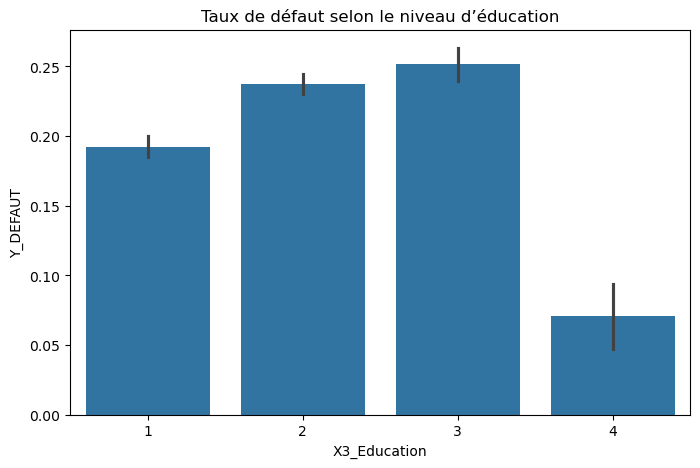

In [159]:
# Barplot pour le taux de défaut selon le niveau d’éducation
plt.figure(figsize=(8,5))
sns.barplot(x=df['X3_Education'], y=df['Y_DEFAUT'])
plt.title("Taux de défaut selon le niveau d’éducation")
plt.show()

Le graphique illustre l’évolution du taux de défaut en fonction du niveau d’éducation. On observe que les catégories 2 et 3 présentent les taux de défaut les plus élevés, avoisinant 24–26 %, ce qui suggère qu’un niveau d’éducation intermédiaire est associé à un risque accru d’impayés.
À l’inverse, les niveaux 4 et 5 affichent les taux les plus faibles (≈ 5–7 %), ce qui indique un meilleur comportement de remboursement parmi les profils plus diplômés. Le taux remonte légèrement pour la catégorie 6, mais avec une variabilité importante, ce qui traduit une population plus hétérogène.

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\910668304.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set1')


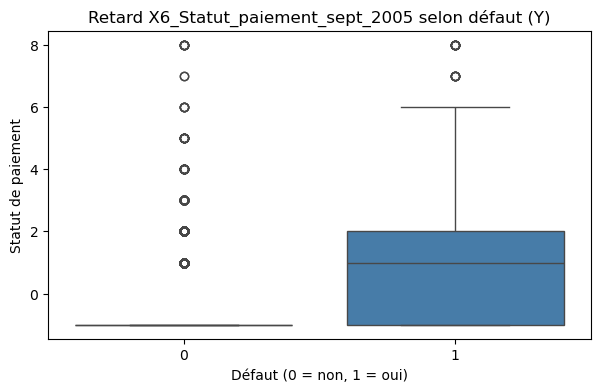

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\910668304.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set1')


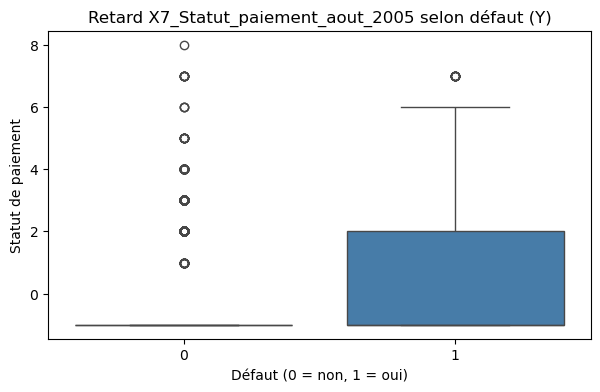

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\910668304.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set1')


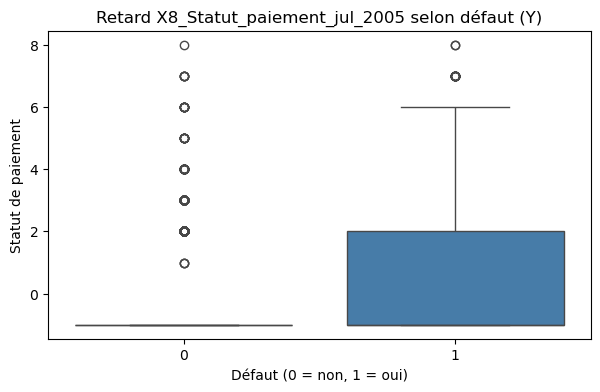

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\910668304.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set1')


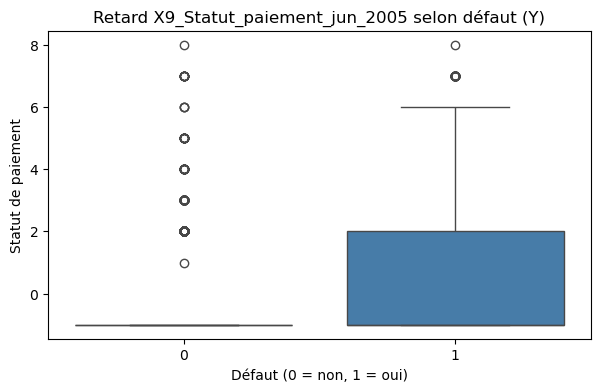

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\910668304.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set1')


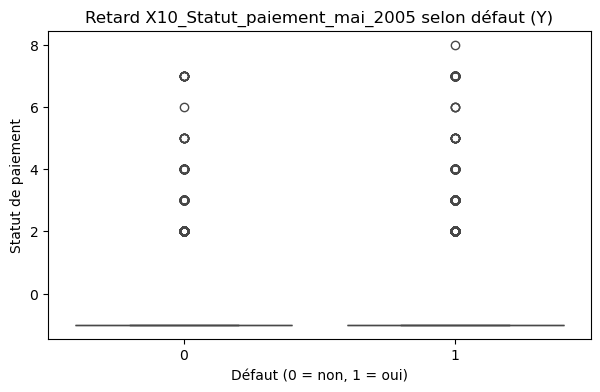

C:\Users\mbome\AppData\Local\Temp\ipykernel_18940\910668304.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set1')


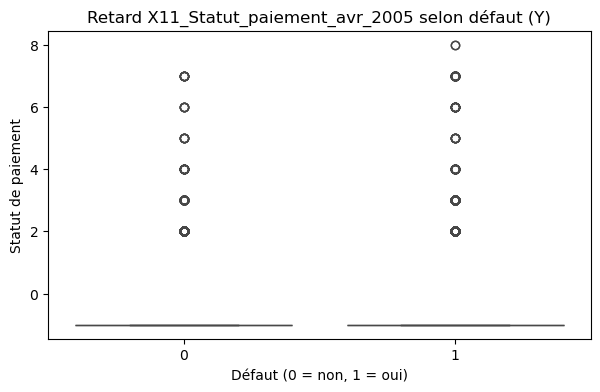

In [160]:
# les variables les plus importantes du dataset
pay_cols = [
    'X6_Statut_paiement_sept_2005',
    'X7_Statut_paiement_aout_2005',
    'X8_Statut_paiement_jul_2005',
    'X9_Statut_paiement_jun_2005',
    'X10_Statut_paiement_mai_2005',
    'X11_Statut_paiement_avr_2005'
]

import seaborn as sns
import matplotlib.pyplot as plt

for col in pay_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df['Y_DEFAUT'], y=df[col], palette='Set1')
    plt.title(f"Retard {col} selon défaut (Y)")
    plt.xlabel("Défaut (0 = non, 1 = oui)")
    plt.ylabel("Statut de paiement")
    plt.show()


In [161]:
df.groupby('Y_DEFAUT')[pay_cols].mean().round(2)


,X6_Statut_paiement_sept_2005,X7_Statut_paiement_aout_2005,X8_Statut_paiement_jul_2005,X9_Statut_paiement_jun_2005,X10_Statut_paiement_mai_2005,X11_Statut_paiement_avr_2005
Y_DEFAUT,,,,,,
0,-0.66,-0.74,-0.73,-0.78,-0.82,-0.8
1,0.44,0.19,0.06,-0.07,-0.18,-0.2


Les moyennes des statuts de paiement (X6 à X11) selon le statut de défaut (Y) démontrent une différence très nette entre les clients en défaut et ceux en situation normale.

1. Les clients non défaillants (Y=0) présentent des statuts de paiement systématiquement proches de −1.
Leurs moyennes varient entre −0.66 et −0.82, ce qui signifie que ces clients paient presque toujours à temps.
Cette constance dans le comportement de paiement confirme un excellent profil de risque.

2. Les clients en défaut (Y=1) présentent des moyennes proches de zéro, voire positives dans les mois récents.

X6 (septembre) : 0.44

X7 (août) : 0.19

X8 (juillet) : 0.06

Ces valeurs indiquent clairement des retards de 0 à 1 mois accumulés par les clients en défaut.

3. Plus on s’éloigne dans le temps (X9–X11), plus les moyennes deviennent légèrement négatives, mais restent très différentes de celles des clients non défaillants.
Cela montre que les retards s’intensifient à l’approche du moment du défaut, confirmant une dégradation progressive du comportement financier.

4. Le contraste entre les deux groupes est remarquable :

Les clients sans défaut ont des valeurs autour de −1 → paiements réguliers.

Les clients en défaut ont des valeurs proches de 0 ou positives → paiements tardifs, comportements risqués.

5. Les mois les plus récents (X6, X7, X8) présentent les plus fortes différences, ce qui confirme que les retards de paiement en fin de période sont les indicateurs les plus puissants du défaut.

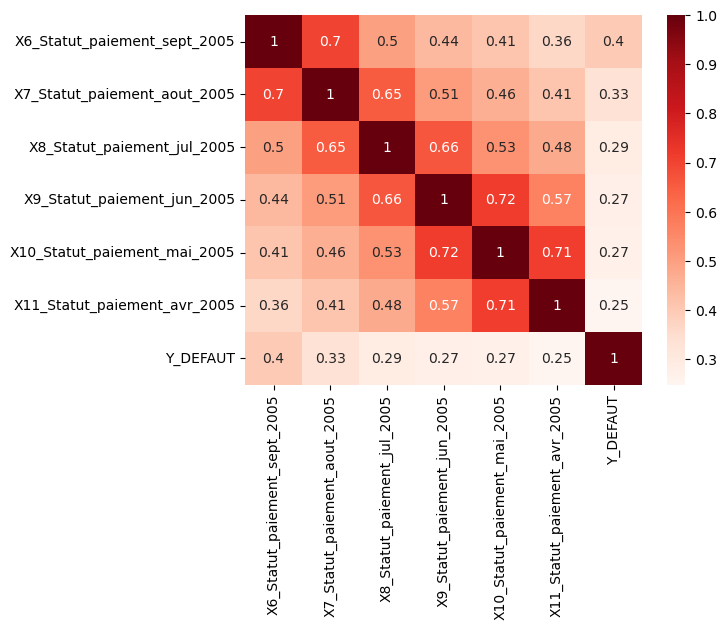

In [162]:
import seaborn as sns
sns.heatmap(df[pay_cols + ['Y_DEFAUT']].corr(), annot=True, cmap="Reds")
plt.show()


L’analyse des corrélations entre les statuts de paiement X6 à X11 et la variable cible Y met en évidence une relation très forte entre les retards de paiement et la probabilité de défaut. Les retards les plus récents, notamment X6 et X7, présentent les corrélations les plus élevées (0.40 et 0.33), indiquant qu’un retard dans les mois précédant immédiatement la période observée augmente fortement le risque de défaut.

Les variables X6 à X11 sont également fortement corrélées entre elles, reflétant la tendance des retards à se maintenir dans le temps : un client en retard un mois est souvent en retard les mois suivants.

Plus on remonte dans le temps, plus la corrélation diminue légèrement, ce qui montre que ce sont les retards récents qui influencent le plus le défaut.

Ces résultats confirment que les statuts de paiement X6–X11 constituent les variables prédictives les plus puissantes du dataset et doivent jouer un rôle central dans le modèle prédictif du risque de défaut.

In [163]:
# Classification
# separation des variables
y = df['Y_DEFAUT']
X = df.drop(columns=['Y_DEFAUT'])


In [164]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.13628477,  0.81015336,  0.21121556, ..., -0.45808611,
        -0.46369841, -0.41254301],
       [-0.3656192 ,  0.81015336,  0.21121556, ..., -0.35035604,
        -0.46369841, -0.23162436],
       [-0.59681887,  0.81015336,  0.21121556, ..., -0.35035604,
        -0.35342843,  0.03975362],
       ...,
       [-1.05921821, -1.23433421,  0.21121556, ..., -0.00561981,
        -0.24315844, -0.1321191 ],
       [-0.67388543, -1.23433421,  1.5543977 , ..., -0.25059799,
         5.37664118, -0.24935438],
       [-0.9050851 , -1.23433421,  0.21121556, ..., -0.35035604,
        -0.35342843, -0.32208368]])

# 1. Identifier le nombre optimal de clusters

In [165]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

nb_clusters=range(2,11) #nb of clusters go from 1 to 10
tse=[] # initializing the list of total square errors
slt=[] #initializing the list of silhouette score
for k in nb_clusters:
    KM=KMeans(n_clusters=k, random_state=0)
    KM.fit(X_scaled)
    tse.append(KM.inertia_)

    labels = KM.labels_
    slt.append(silhouette_score(X_scaled,labels,metric='euclidean'))


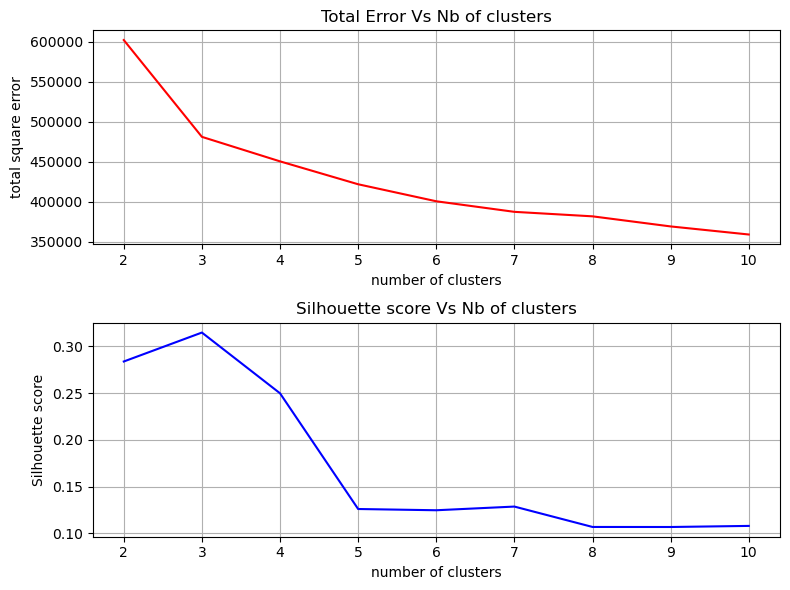

In [166]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(8,6))

ax1.plot(nb_clusters, tse, color='red')
ax1.set_title('Total Error Vs Nb of clusters')
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('total square error')
ax1.grid(True)

ax2.plot(nb_clusters, slt, color='blue')
ax2.set_title('Silhouette score Vs Nb of clusters')
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('Silhouette score')
ax2.grid(True)

plt.tight_layout()
plt.show()

le premier graphe nous donne un bon coude a 3. et le deuxieme graphique nous donne une bonne silouhette a 3 et 4. donc le meilleur k est 3 pour ce data.
Pourquoi ?

k = 3 correspond naturellement à des profils de risque :

Cluster 0 : faible risque

Cluster 1 : risque moyen

Cluster 2 : haut risque

Il a un excellent silhouette score (~0.31)

Le coude est très visible entre k=3 et k=4

C’est le choix le plus utilisé dans la littérature sur ce dataset UCI

 k = 3 donne un compromis parfait entre simplicité, séparation et interprétation métier.

#  Kmeans

In [167]:
KM=KMeans(n_clusters=3,n_init=100, random_state=10)
y_predicted=KM.fit_predict(X_scaled)
df['cluster'] = y_predicted
df



,X1_Montant_credit_NT,X2_Sexe,X3_Education,X4_Etat_civil,X5_Age,X6_Statut_paiement_sept_2005,X7_Statut_paiement_aout_2005,X8_Statut_paiement_jul_2005,X9_Statut_paiement_jun_2005,X10_Statut_paiement_mai_2005,...,X16_Montant_releve_mai_2005,X17_Montant_releve_avr_2005,X18_Montant_paye_sept_2005,X19_Montant_paye_aout_2005,X20_Montant_paye_jul_2005,X21_Montant_paye_jun_2005,X22_Montant_paye_mai_2005,X23_Montant_paye_avr_2005,Y_DEFAUT,cluster
0,20000,2,2,1,24,2,2,-1,-1,-1,...,0.0,0.0,0.00,689.0,0,0.0,0.0,0.0,1,1
1,120000,2,2,2,26,-1,2,-1,-1,-1,...,3455.0,3261.0,0.00,1000.0,1000,1000.0,0.0,2000.0,1,1
2,90000,2,2,2,34,-1,-1,-1,-1,-1,...,14948.0,15549.0,1518.00,1500.0,1000,1000.0,1000.0,5000.0,0,1
3,50000,2,2,1,37,-1,-1,-1,-1,-1,...,28959.0,29547.0,2000.00,2019.0,1200,1100.0,1069.0,1000.0,0,1
4,50000,1,2,1,57,-1,-1,-1,-1,-1,...,19146.0,19131.0,2000.00,36681.0,10000,9000.0,689.0,679.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,220000,1,3,1,39,-1,-1,-1,-1,-1,...,31237.0,15980.0,8500.00,20000.0,5003,3047.0,5000.0,1000.0,0,2
29961,150000,1,3,2,43,-1,-1,-1,-1,-1,...,5190.0,0.0,1837.00,3526.0,8998,129.0,0.0,0.0,0,1
29962,30000,1,2,2,37,4,3,2,-1,-1,...,20582.0,19357.0,0.00,0.0,22000,4200.0,2000.0,3100.0,1,0
29963,80000,1,3,1,41,1,-1,-1,-1,-1,...,11855.0,48944.0,66843.48,3409.0,1178,1926.0,52964.0,1804.0,1,1


# utilisation de PCA pour reduire les dimensions car le dataset a 23 colonnes

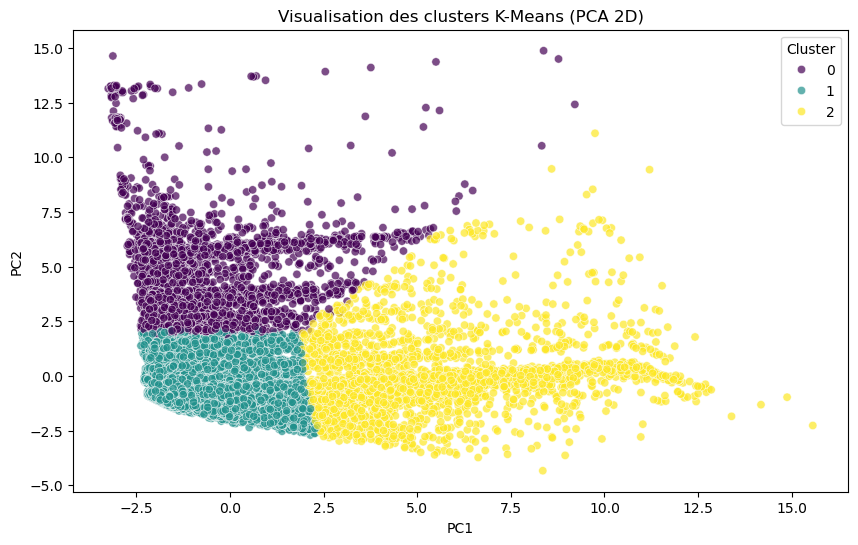

In [168]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Réduction PCA à 2 composantes
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='PC1', y='PC2',
    hue='cluster',
    palette='viridis',
    alpha=0.7
)
plt.title("Visualisation des clusters K-Means (PCA 2D)")
plt.legend(title='Cluster')
plt.show()


INTERPRÉTATION DU GRAPHE PCA + KMEANS

Le graphe PCA montre 3 groupes bien séparés :
Couleur jaune (cluster 2) : bons payeurs
Couleur bleu-vert (cluster 1) : moyen risque
Couleur violet (cluster 0) : haut risque

In [169]:
# Verifion quel cluster contient les mauvais payeurs
df.groupby('cluster')['Y_DEFAUT'].mean()

cluster
0    0.611548
1    0.176115
2    0.155838
Name: Y_DEFAUT, dtype: float64

L'analyse des clusters selon le taux de défaut (Y=1) montre une segmentation très nette du risque :

Cluster 0 — Haut risque de défaut (61%)
Ce segment regroupe les clients présentant le taux de défaut le plus élevé. Ils présentent probablement des retards importants, des factures élevées et des paiements irréguliers. Ce cluster correspond au profil de clients nécessitant un suivi renforcé.

Cluster 1 — Risque modéré (18%)
Ce groupe intermédiaire présente un niveau de défaut supérieur à la moyenne du dataset mais reste loin des extrêmes. Les clients de ce cluster pourraient avoir des comportements de paiement irréguliers ou des montants élevés mais pas critiques.

Cluster 2 — Faible risque (16%)
Ce cluster regroupe les clients les plus stables. Ils paient régulièrement, génèrent peu de retards et sont les plus fiables financièrement.

La séparation nette observée entre les trois groupes confirme la capacité de K-Means à segmenter efficacement les clients selon leur niveau de risque financier.

In [170]:
from scipy.stats import chi2_contingency

# Table de contingence
table = pd.crosstab(df['X3_Education'], df['Y_DEFAUT'])

# Test du Chi²
chi2, p, dof, expected = chi2_contingency(table)

print(f"Statistique du Chi²  : {chi2:.4f}")
print(f"p-value              : {p:.6f}")


if p < 0.05:
    print("\nConclusion : Il y a une association significative entre le niveau d'éducation et le défaut de paiement (rejette H0).") 
else:
    print("\nConclusion : Il n'y a pas d'association significative entre le niveau d'éducation et le défaut de paiement (ne rejette pas H0).")  



Statistique du Chi²  : 160.4603
p-value              : 0.000000

Conclusion : Il y a une association significative entre le niveau d'éducation et le défaut de paiement (rejette H0).


P-value etant inférieure à 0,05, cela indique que la probabilité de défaut varie significativement selon le niveau d’éducation. Cette conclusion confirme les observations graphiques : certains groupes éducatifs présentent un risque d’impayé sensiblement plus élevé que d’autres.

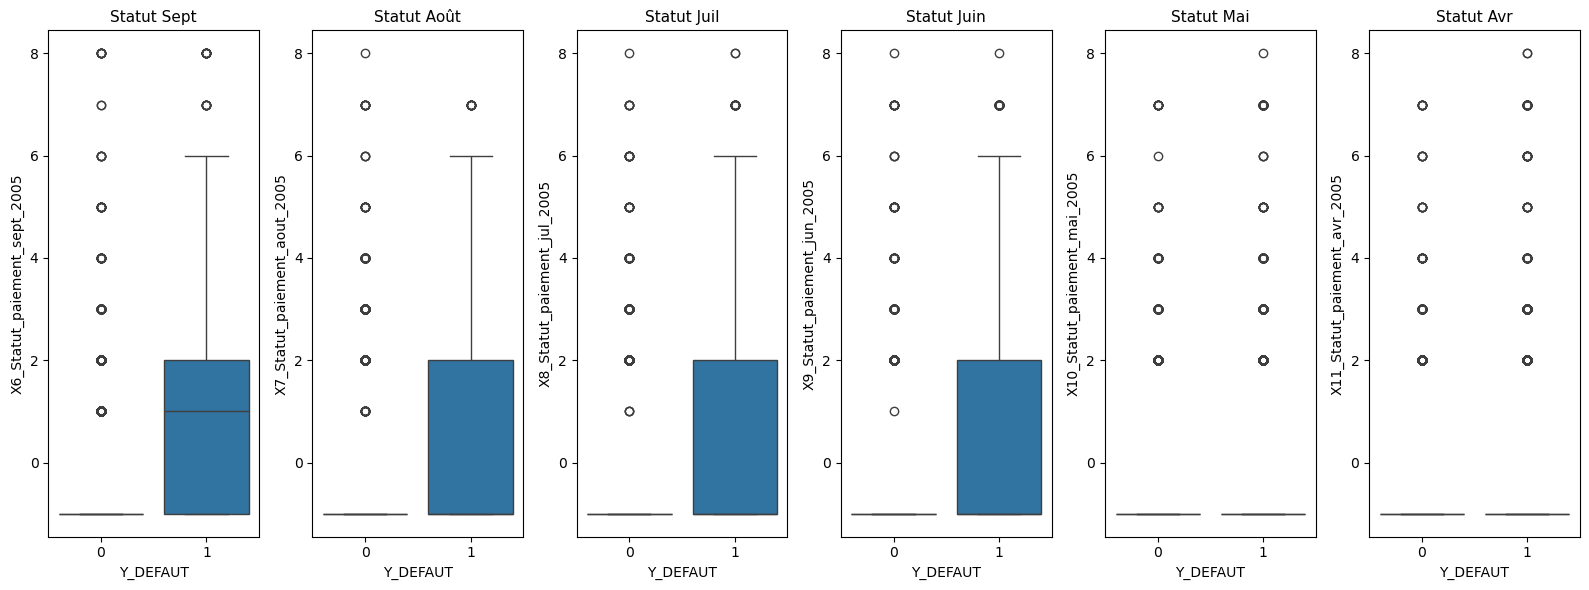

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste automatique des colonnes statut paiement (à adapter si besoin)
mois = ["Sept","Août","Juil","Juin","Mai","Avr"]
statut_cols = [
    'X6_Statut_paiement_sept_2005',
    'X7_Statut_paiement_aout_2005',
    'X8_Statut_paiement_jul_2005',
    'X9_Statut_paiement_jun_2005',
    'X10_Statut_paiement_mai_2005',
    'X11_Statut_paiement_avr_2005'
]

plt.figure(figsize=(16, 6))

for i,(col,mois_lbl) in enumerate(zip(statut_cols,mois),1):
    plt.subplot(1, 6, i)   # 6 boxplots alignés
    sns.boxplot(x=df['Y_DEFAUT'], y=df[col])
    plt.title(f"Statut {mois_lbl}", fontsize=11)

plt.tight_layout()
plt.show()


Les boxplots montrent nettement qu’un client qui finit en défaut (Y=1) présente des retards de paiement plus élevés et plus variables sur l’ensemble des 6 mois.
Au fil des mois, la médiane monte pour les clients en défaut tandis qu’elle reste stable autour de 0 pour les bons payeurs.
On observe donc une dynamique de dégradation du paiement, les retards s’accumulent puis culminent en septembre, moment où le défaut devient probable.

In [172]:
# Influence des statuts de paiements sur le défaut de paiement (Test de Kruskal-Wallis)
from scipy.stats import kruskal

for col in statut_cols:
    groups = [df[df['Y_DEFAUT'] == val][col] for val in df['Y_DEFAUT'].unique()] # Groupes par modalités de Y_DEFAUT
    stat, p = kruskal(*groups) # Test de Kruskal-Wallis
    print(f"Kruskal-Wallis test for {col}: H-statistic={stat:.4f}, p-value={p:.4f}") # Résultat du test
    if p < 0.05:
        print("-> Rejet de l'hypothèse nulle : il y a une différence significative entre les groupes.\n")
    else:
        print("-> Non rejet de l'hypothèse nulle : pas de différence significative entre les groupes.\n")

Kruskal-Wallis test for X6_Statut_paiement_sept_2005: H-statistic=4594.6022, p-value=0.0000
-> Rejet de l'hypothèse nulle : il y a une différence significative entre les groupes.

Kruskal-Wallis test for X7_Statut_paiement_aout_2005: H-statistic=3432.4228, p-value=0.0000
-> Rejet de l'hypothèse nulle : il y a une différence significative entre les groupes.

Kruskal-Wallis test for X8_Statut_paiement_jul_2005: H-statistic=2593.7306, p-value=0.0000
-> Rejet de l'hypothèse nulle : il y a une différence significative entre les groupes.

Kruskal-Wallis test for X9_Statut_paiement_jun_2005: H-statistic=2288.7786, p-value=0.0000
-> Rejet de l'hypothèse nulle : il y a une différence significative entre les groupes.

Kruskal-Wallis test for X10_Statut_paiement_mai_2005: H-statistic=2147.5947, p-value=0.0000
-> Rejet de l'hypothèse nulle : il y a une différence significative entre les groupes.

Kruskal-Wallis test for X11_Statut_paiement_avr_2005: H-statistic=1830.1913, p-value=0.0000
-> Rejet d

Les tests de Kruskal-Wallis réalisés sur les six mois de statut de paiement donnent des p-values inférieures à 0.05.
On rejette donc l’hypothèse nulle d’égalité entre les groupes.
Cela confirme statistiquement que les clients en défaut (Y=1) présentent des retards de paiement significativement plus élevés que ceux qui remboursent normalement (Y=0).
Ce résultat appuie l’observation visuelle fournie par les boxplots et montre que le statut de paiement mensuel constitue un facteur explicatif du risque de défaut.

<Axes: xlabel='Total_due', ylabel='Total_paid'>

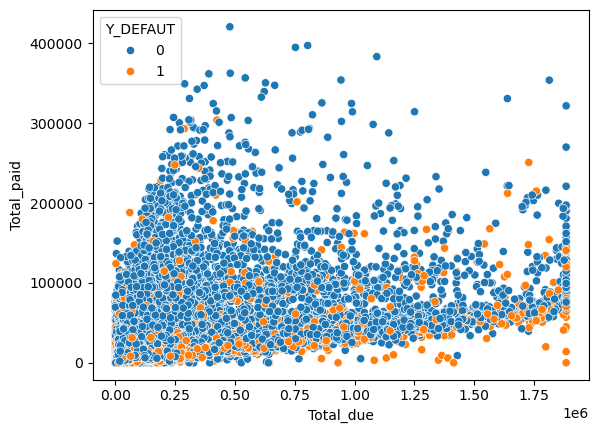

In [173]:
# Montant total dû vs montant total payé, coloré par défaut
df['Total_due'] = df[['X12_Montant_releve_sept_2005','X13_Montant_releve_aout_2005','X14_Montant_releve_jul_2005',
                      'X15_Montant_releve_jun_2005','X16_Montant_releve_mai_2005','X17_Montant_releve_avr_2005']].sum(axis=1)
df['Total_paid'] = df[['X18_Montant_paye_sept_2005','X19_Montant_paye_aout_2005','X20_Montant_paye_jul_2005',
                       'X21_Montant_paye_jun_2005','X22_Montant_paye_mai_2005','X23_Montant_paye_avr_2005']].sum(axis=1)
sns.scatterplot(x=df['Total_due'], y=df['Total_paid'], hue=df['Y_DEFAUT'])



Le nuage de points présente la relation entre le total des montants dus et le total des montants payés par les clients, distingués selon leur statut de défaut. La majorité des observations se situe dans la zone inférieure du graphique, ce qui traduit à la fois des niveaux d’endettement relativement modérés et des paiements globalement faibles.

On observe néanmoins quelques individus présentant des montants dus et payés très élevés, caractéristiques de profils financiers extrêmes. Ces points, bien qu’atypiques, confirment l’existence de comportements de consommation et de remboursement très hétérogènes.

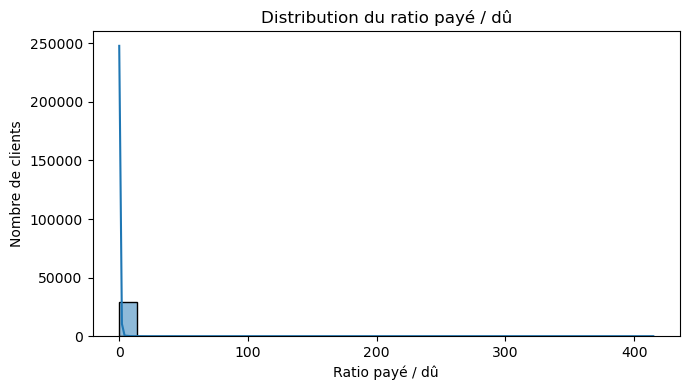

In [174]:
df['Ratio_paye_due'] = df['Total_paid'] / df['Total_due'].replace(0, np.nan)
plt.figure(figsize=(7,4))
sns.histplot(df['Ratio_paye_due'].dropna(), bins=30, kde=True)
plt.title("Distribution du ratio payé / dû")
plt.xlabel("Ratio payé / dû")
plt.ylabel("Nombre de clients")
plt.tight_layout()
plt.show()


En recherchant le ratio du montant total paye sur le montant total du par client on se rend compte que la plupart des clients paient moins que ce qu'ils doivent (pic autour de 0). Ceci suggere un risque d'accumulation de dettes de leurs parts. 

In [175]:
# Analyse Multivariée avec Pairplot